# Predicting Hotel Booking Cancellations: Building a Decision Tree Model - Assignment

Load the important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder, LabelEncoder,MinMaxScaler
from sklearn.tree import plot_tree
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score,r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
# from google.colab import files

# Load the dataset

Type Markdown and LaTeX:  𝛼2

In [2]:
df=pd.read_csv('hotel.csv')

# Understand the Data

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
#Here are the few commands which will help us to understand the basic data 
#The info command will help us to understand the different columns present in the dataset and its datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
#Len command will help us understand the total number of records present in the dataset
len(df)

119390

In [6]:
#.columns command will help us understand the columns present in the dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
#The below command will help us understand the total number of columns present in the dataset
len(df.columns)

32

In [8]:
df.shape

(119390, 32)

In [9]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# creating the profiling to understand the data

In [10]:
! pip install sweetviz

In [11]:
import sweetviz as sv

In [12]:
report=sv.analyze(df,target_feat='is_canceled')

                                             |          | [  0%]   00:00 -> (? left)


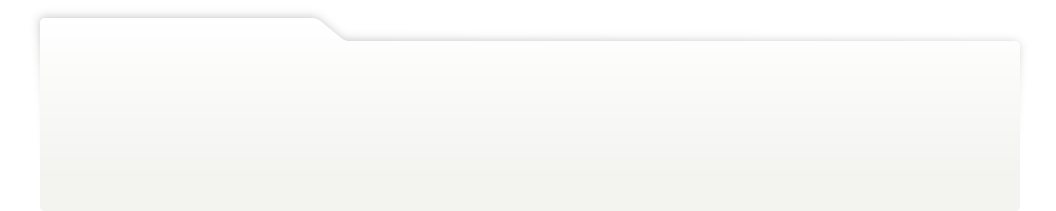
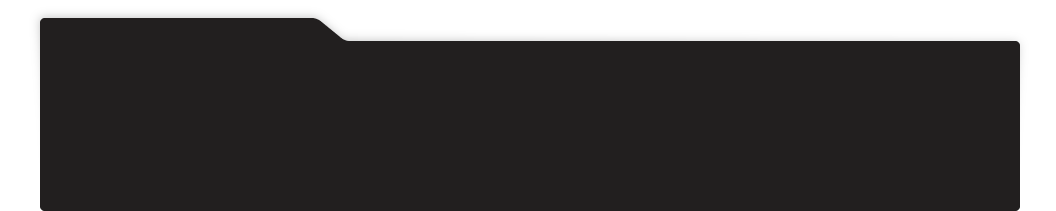
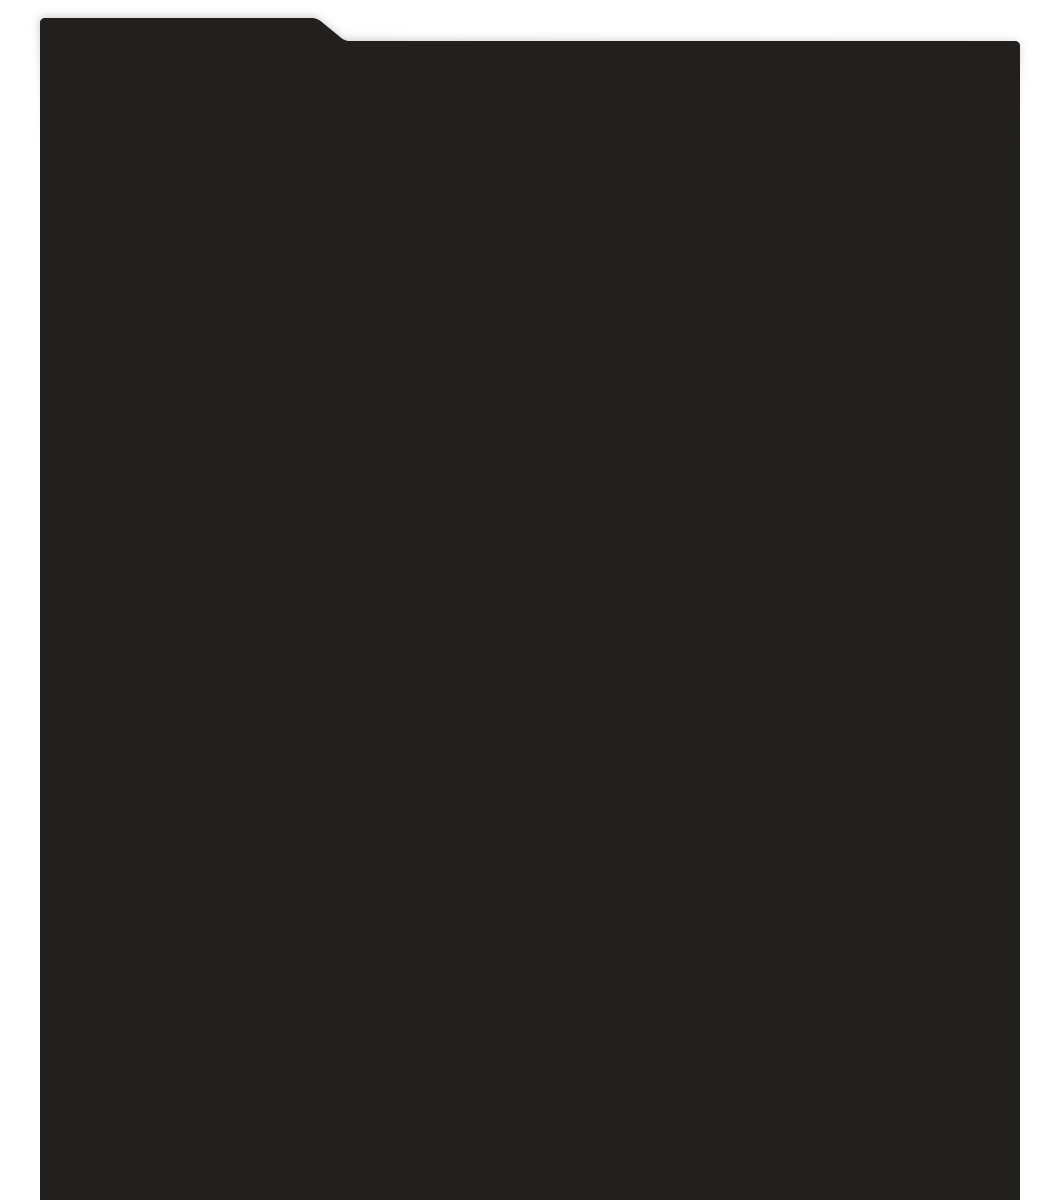
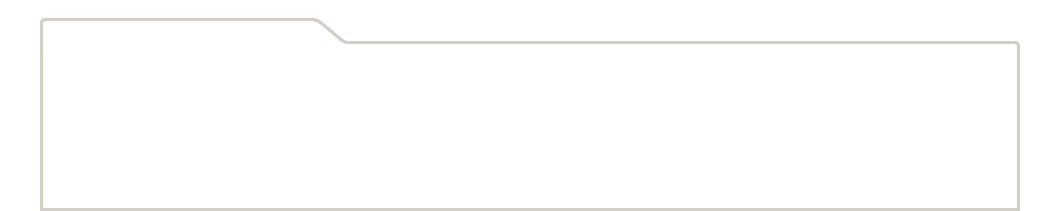
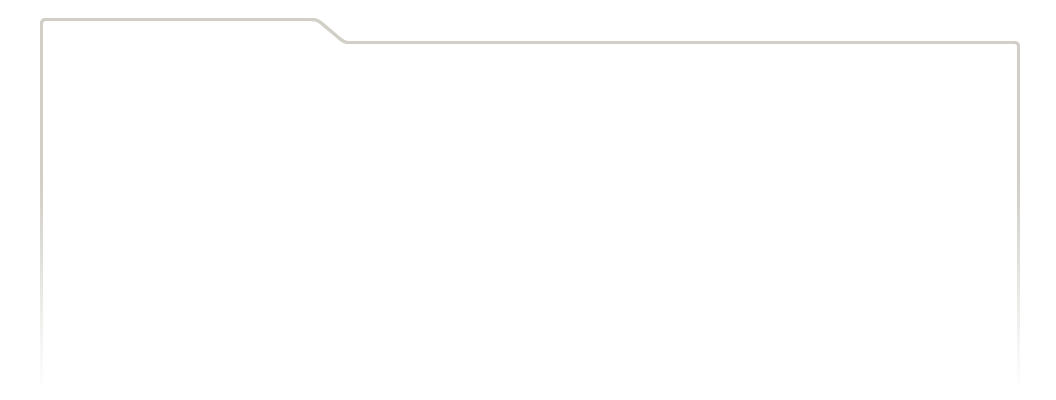
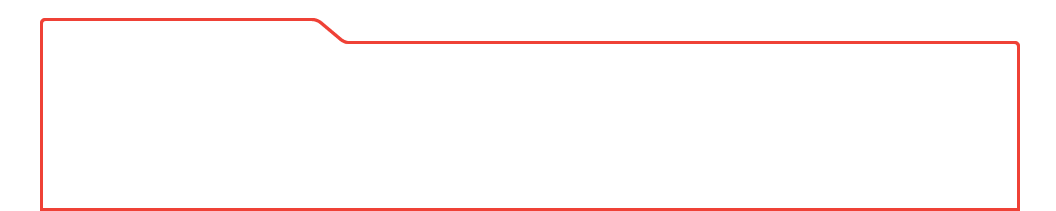
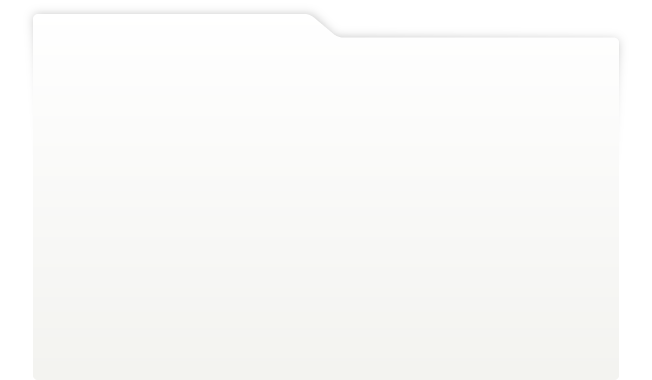
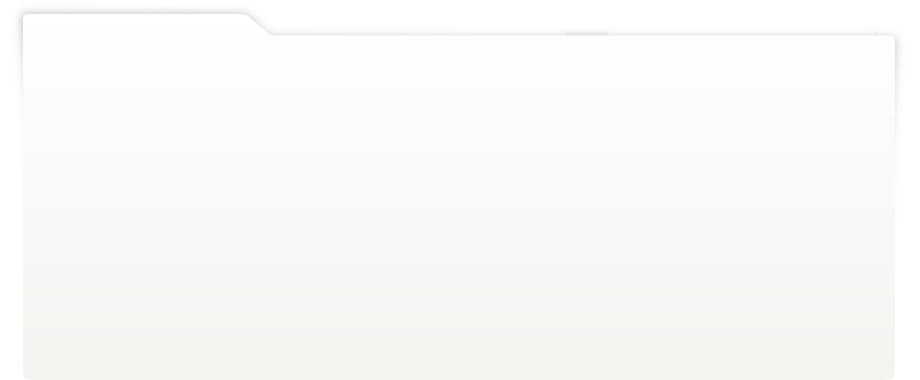
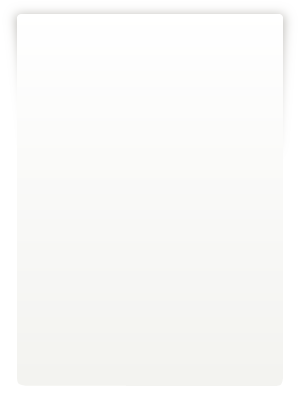
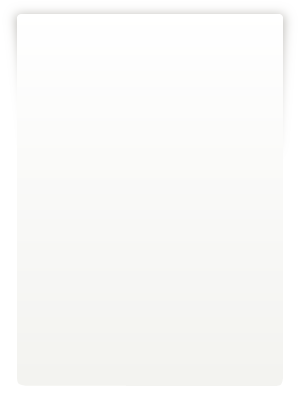
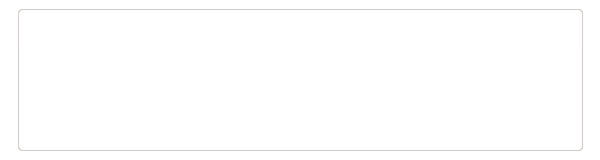
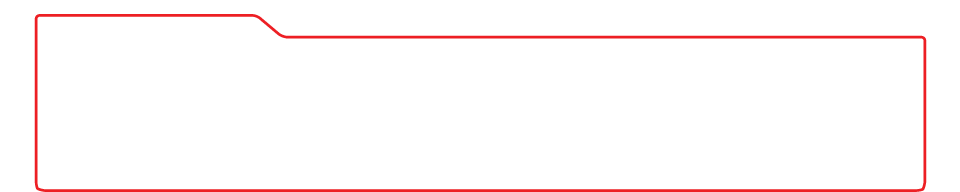
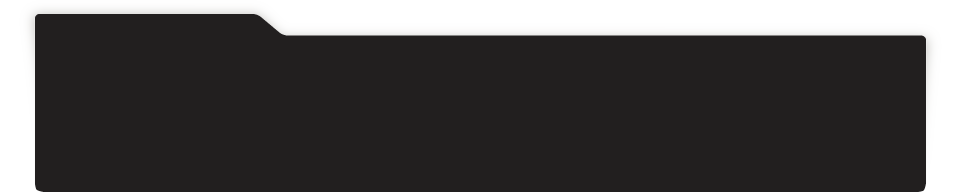
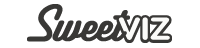
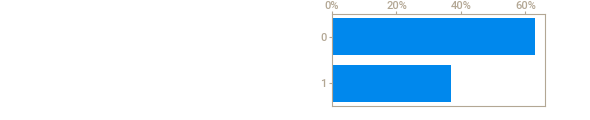
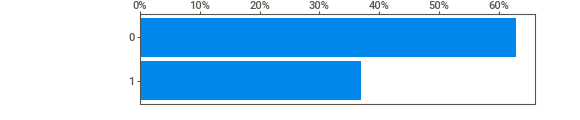
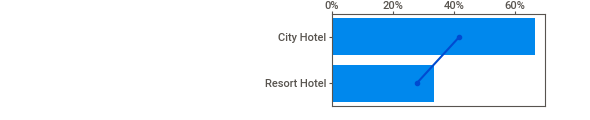
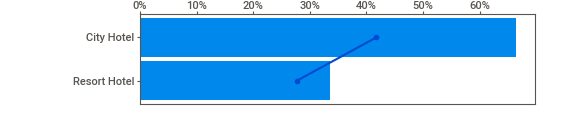
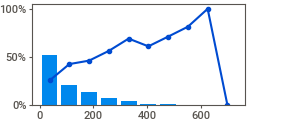
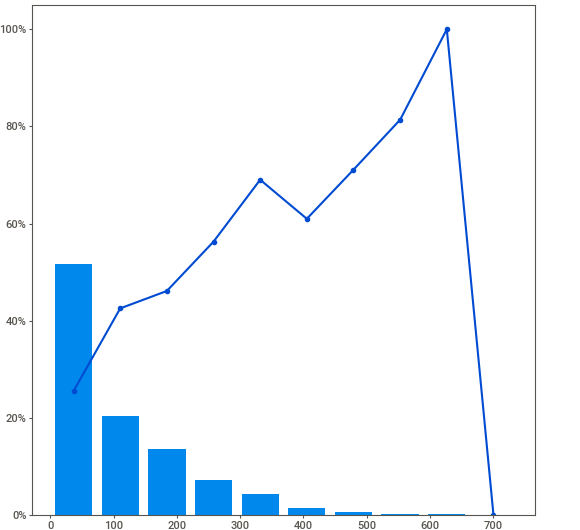
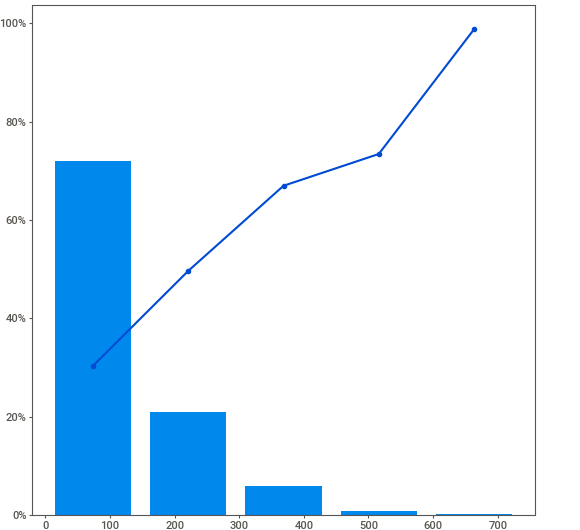
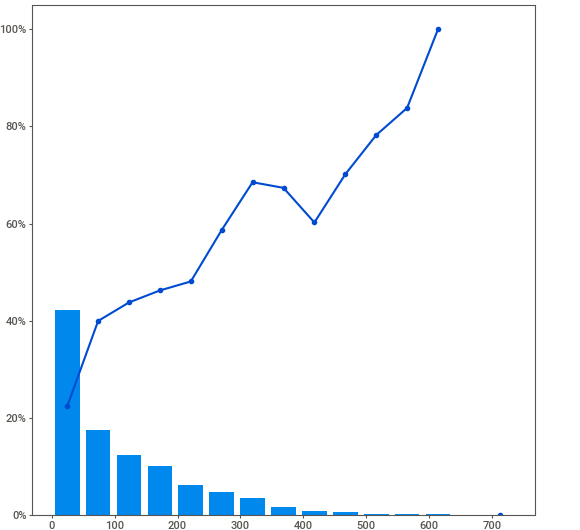
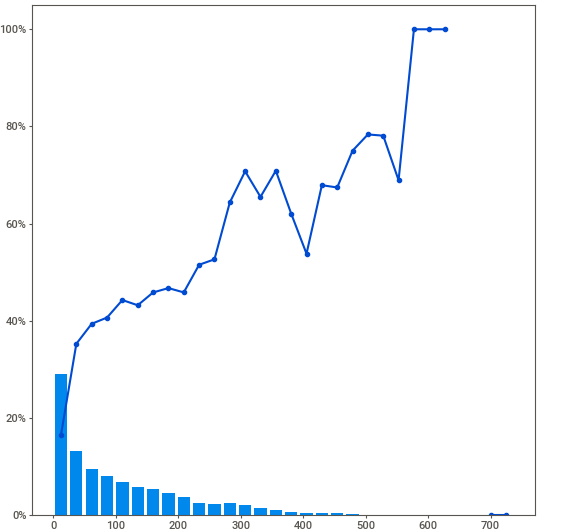
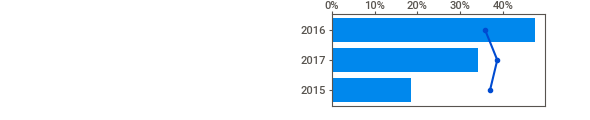
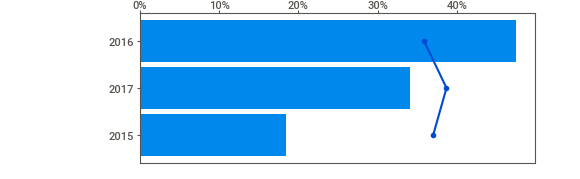
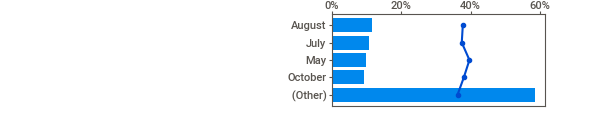
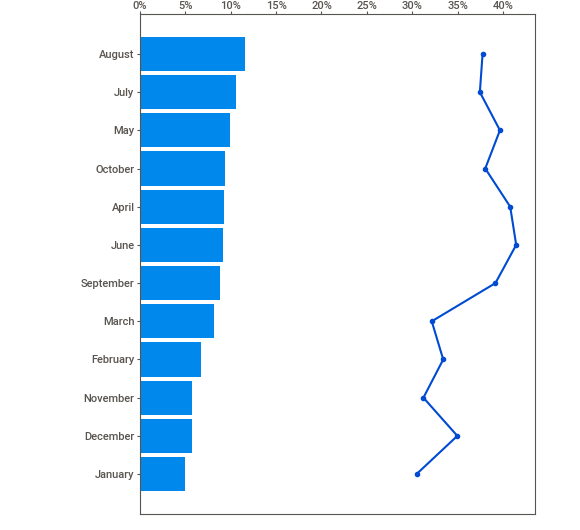
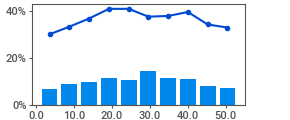
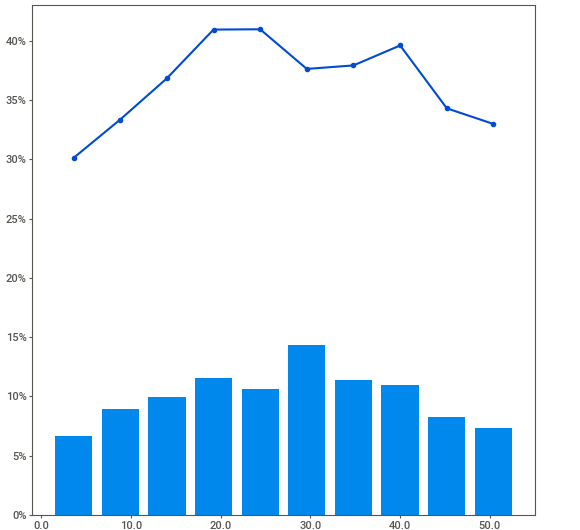
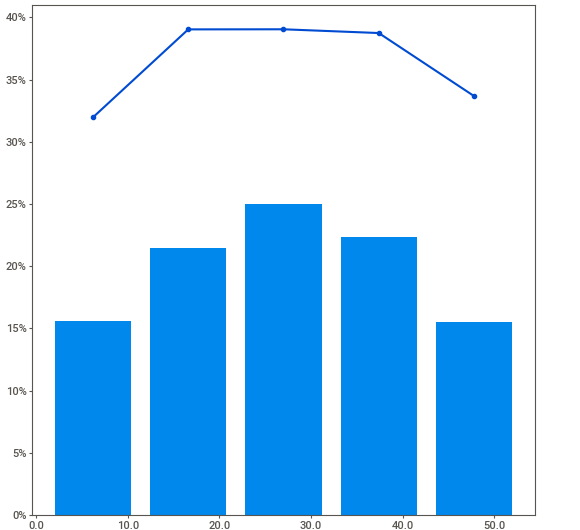
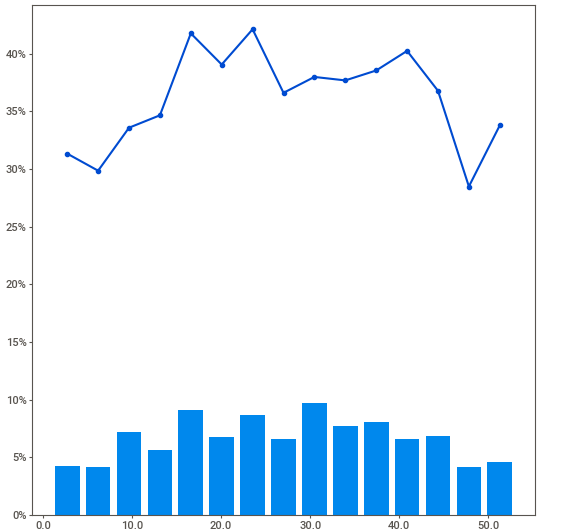
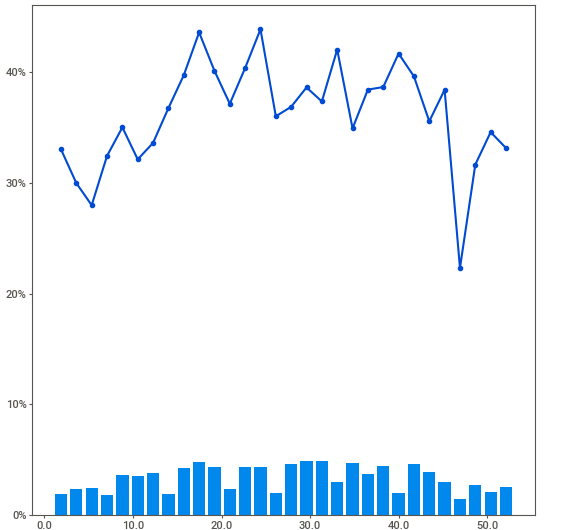
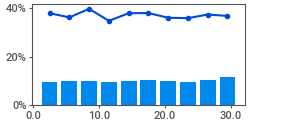
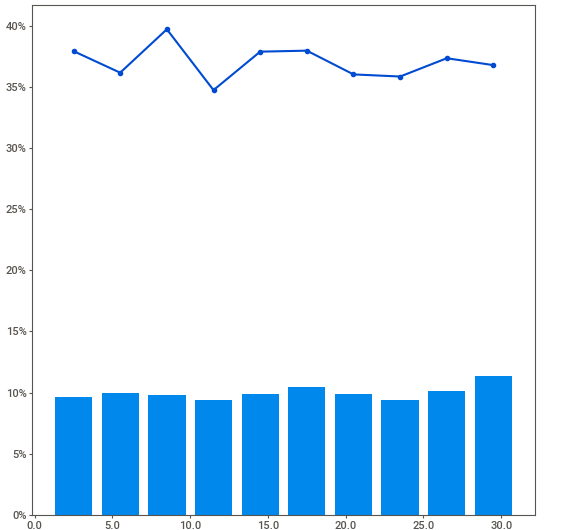
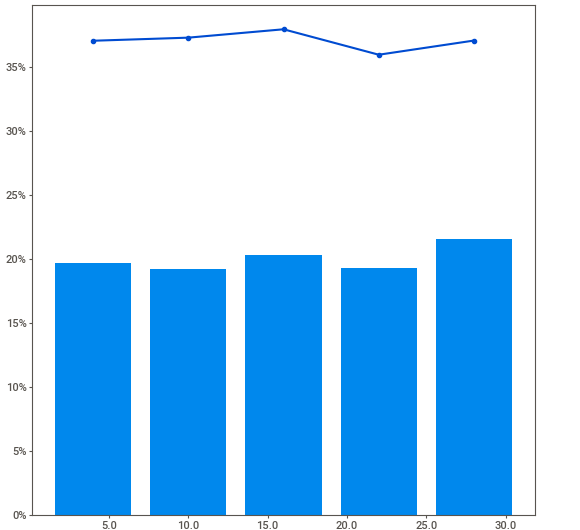
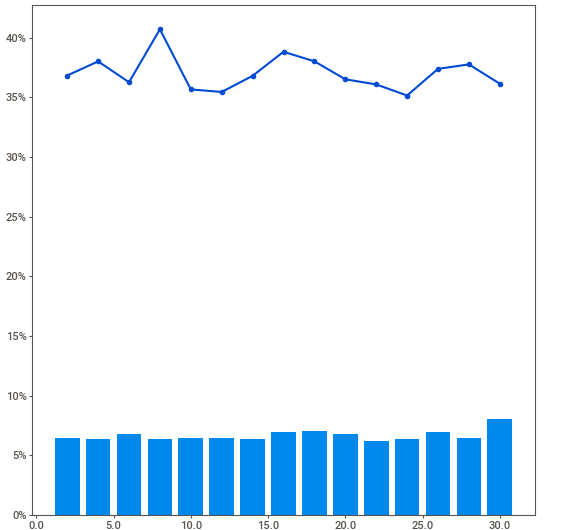
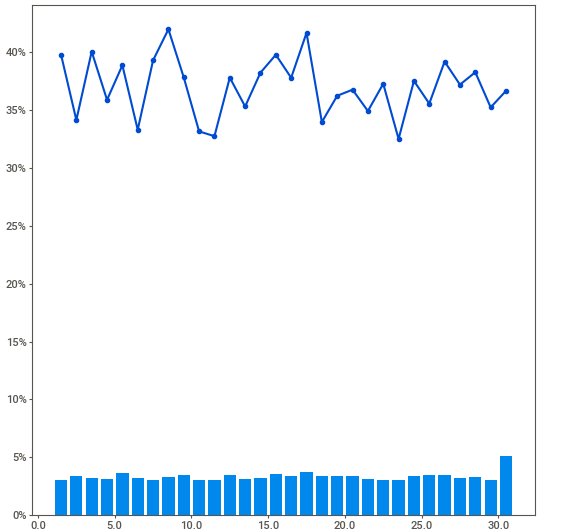
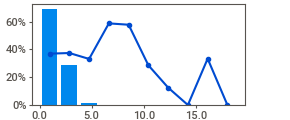
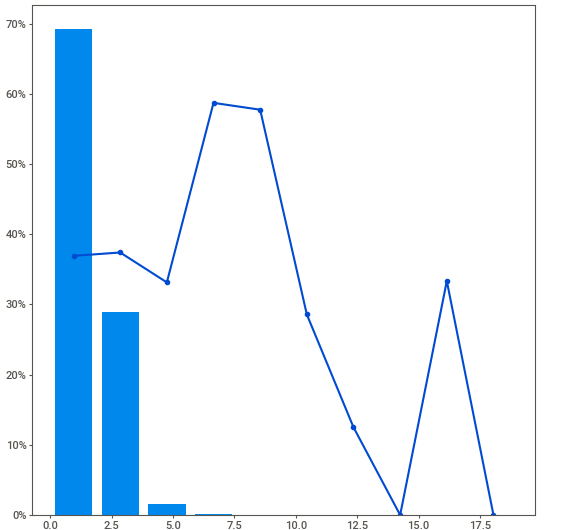
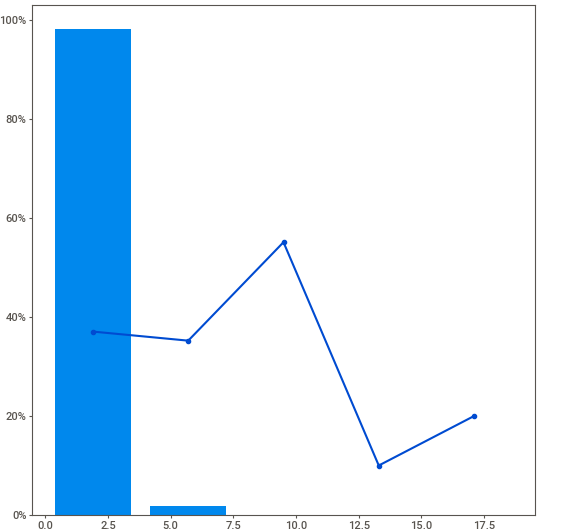
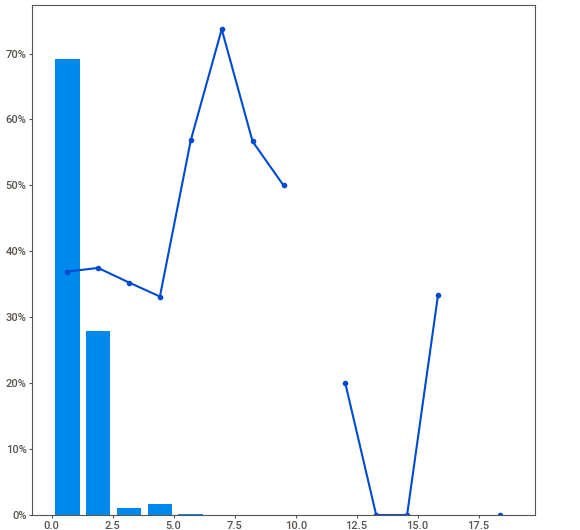
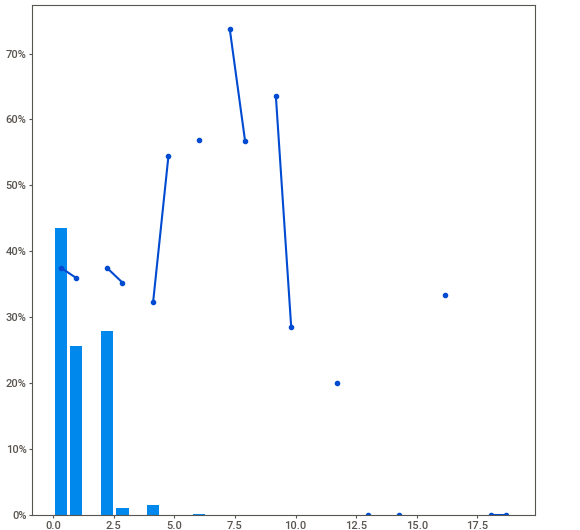
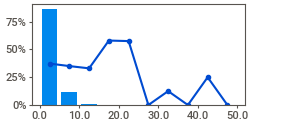
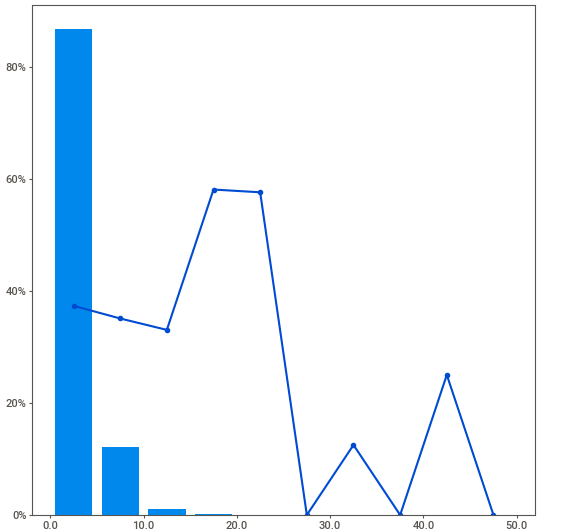
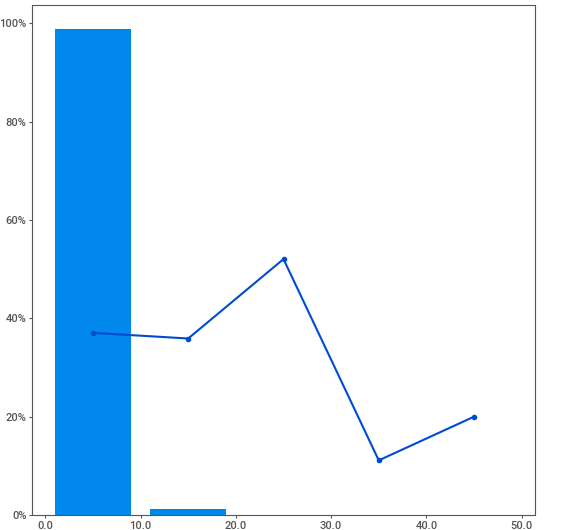
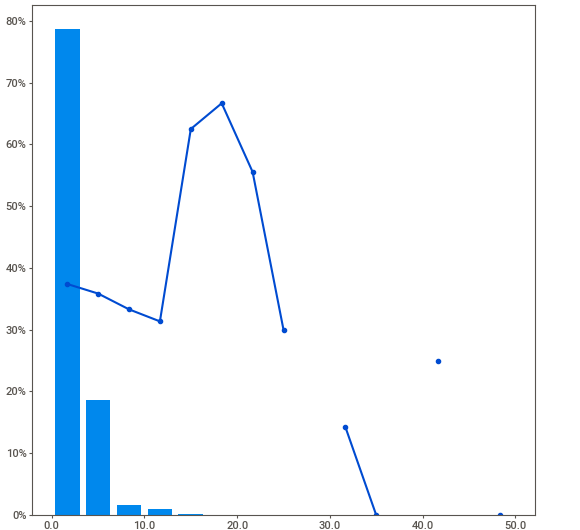
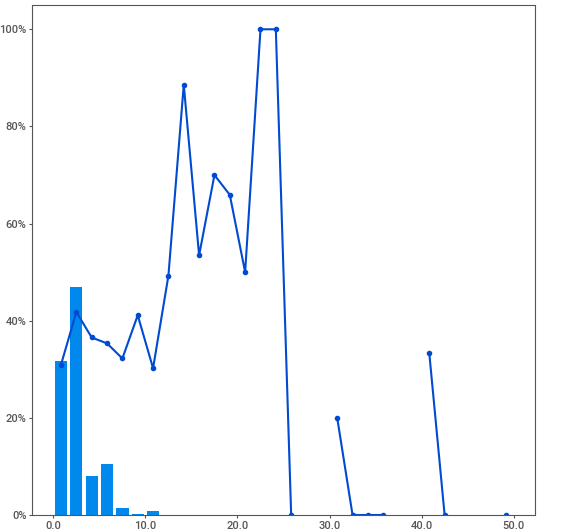
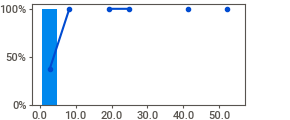
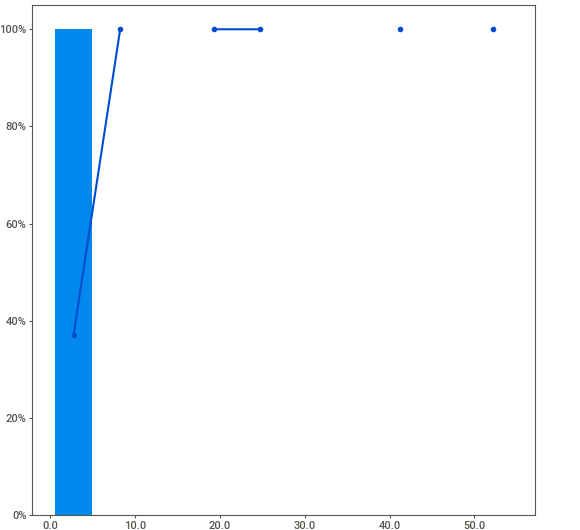
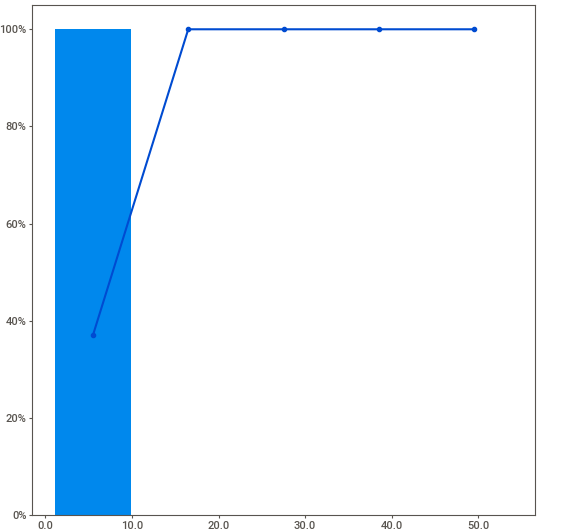
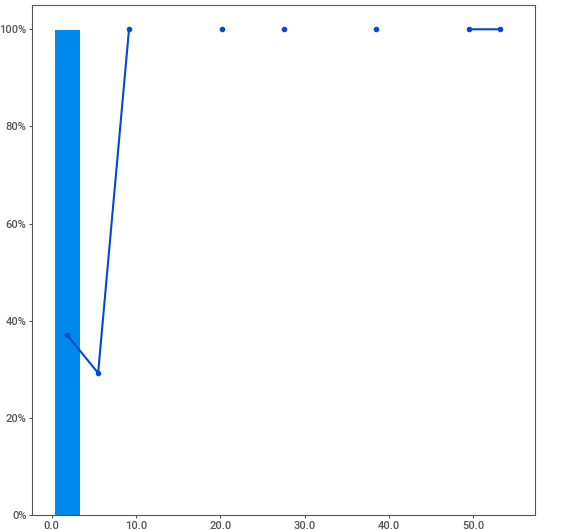
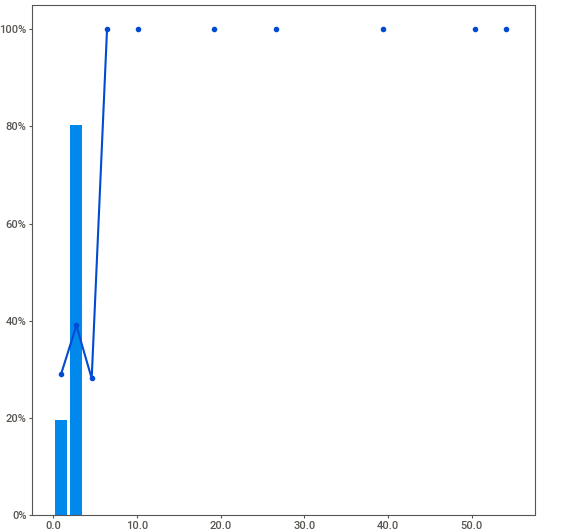
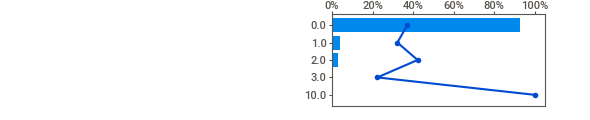
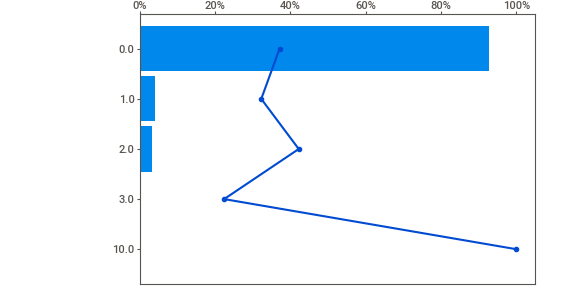
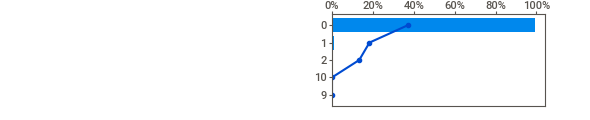
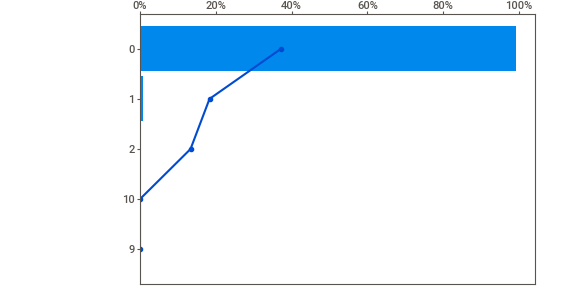
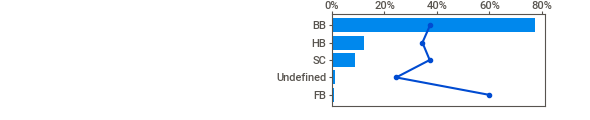
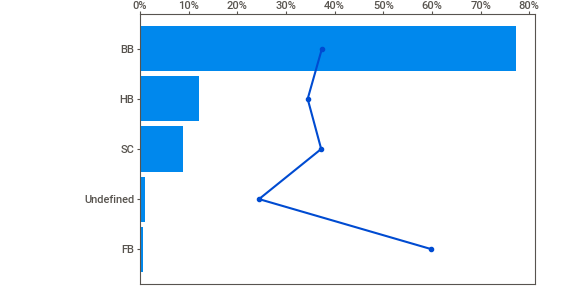
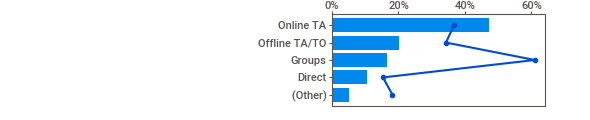
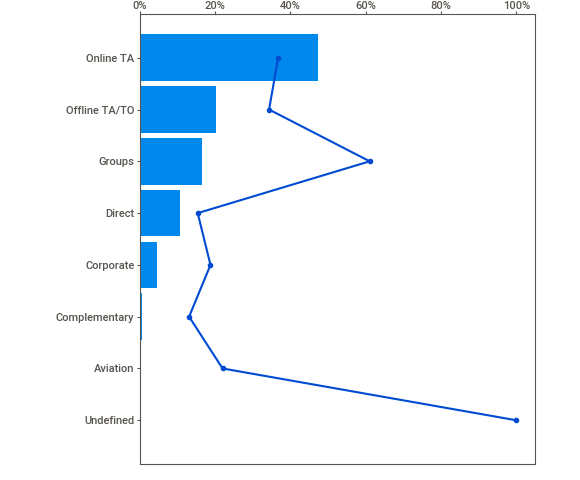
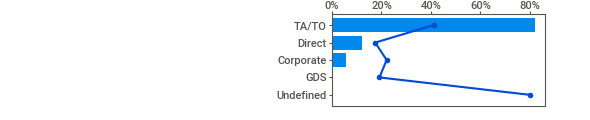
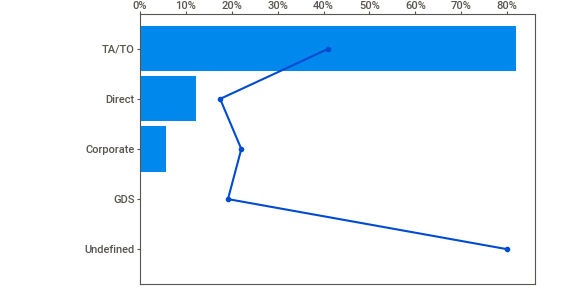
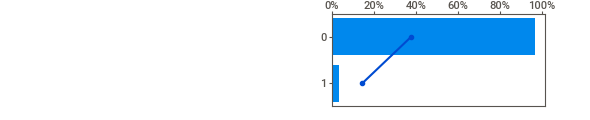
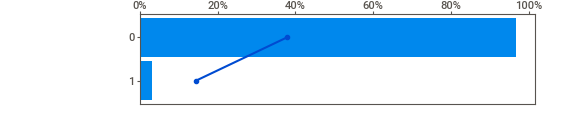
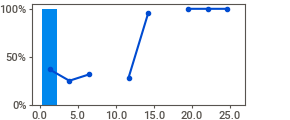
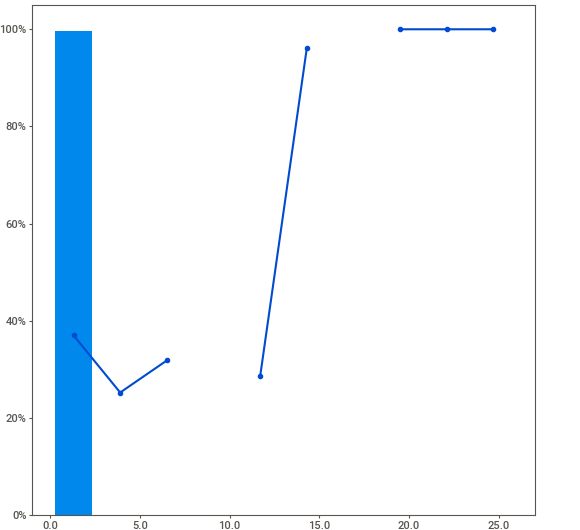
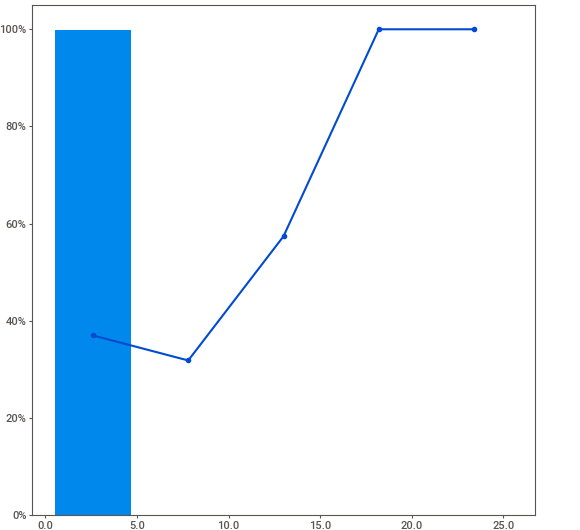
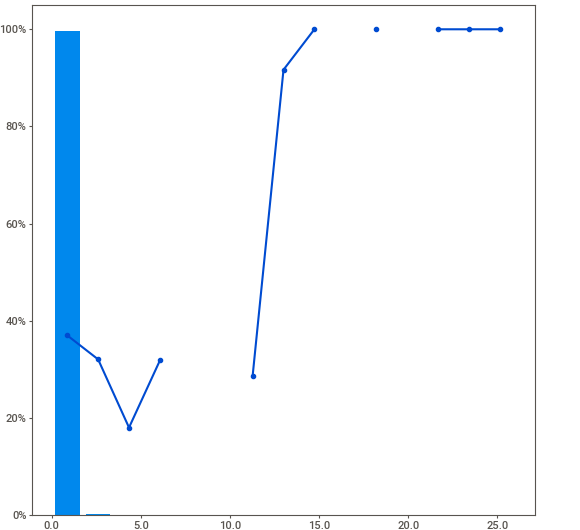
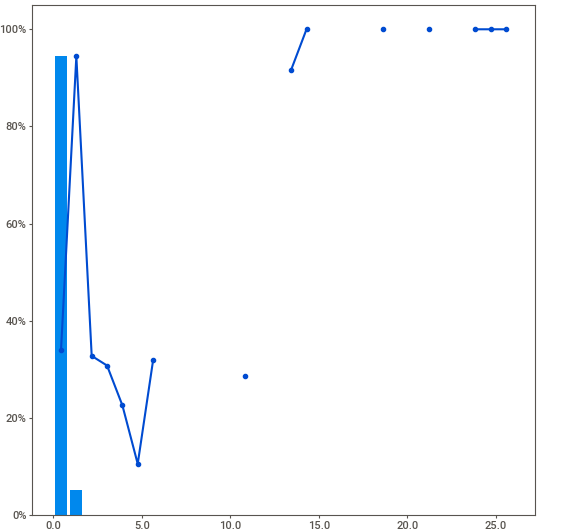
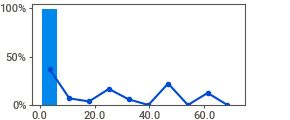
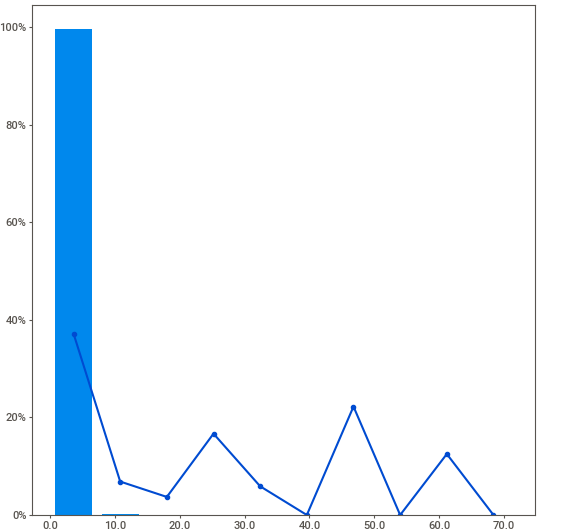
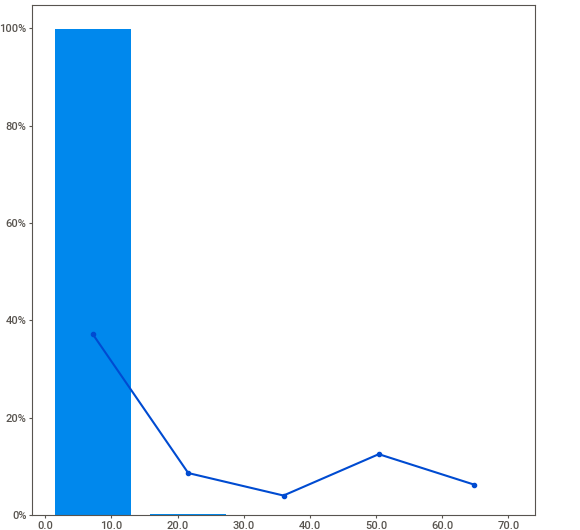
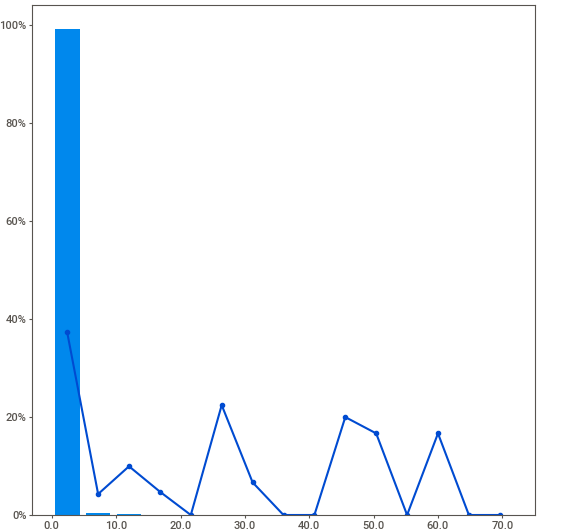
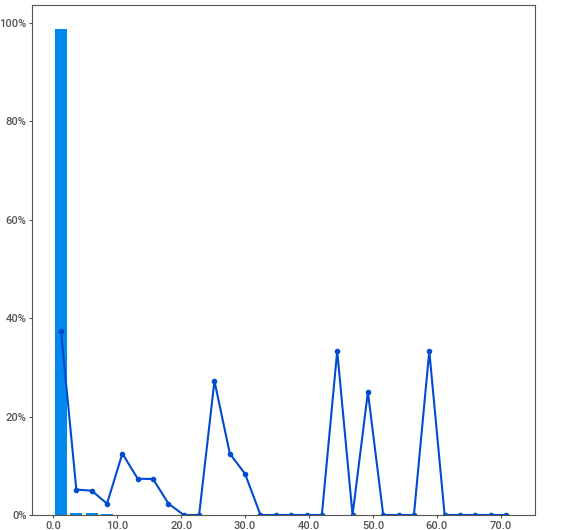
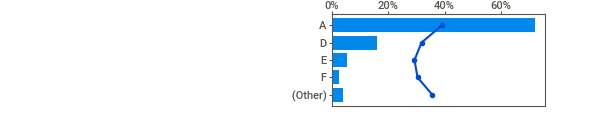
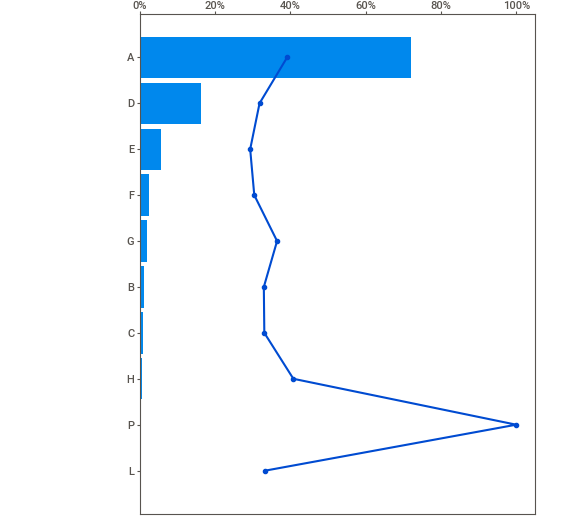
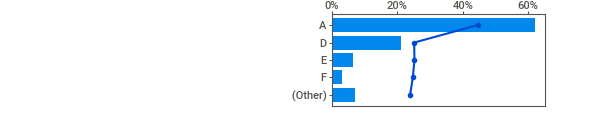
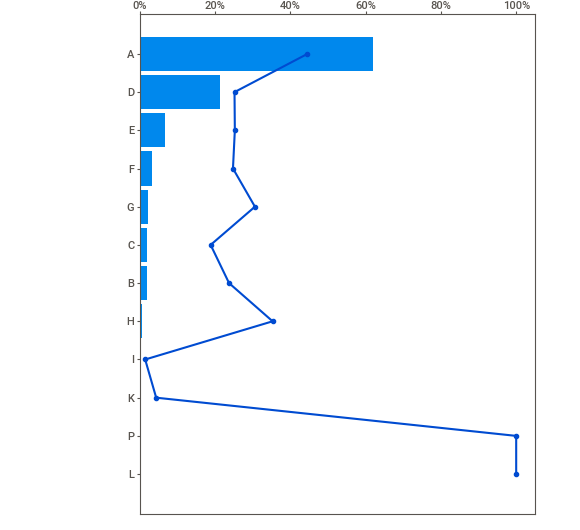
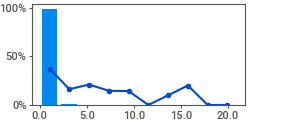
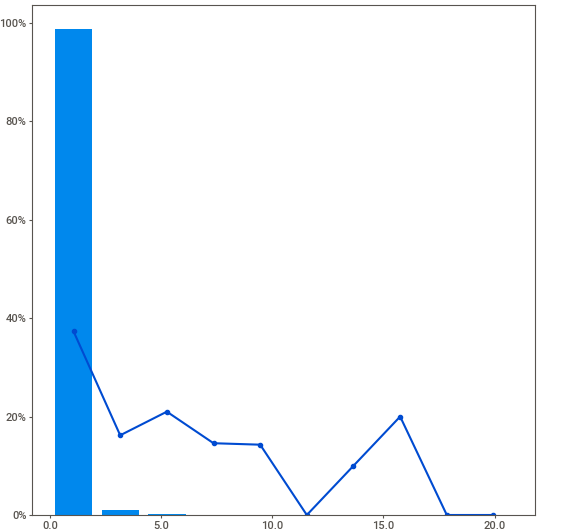
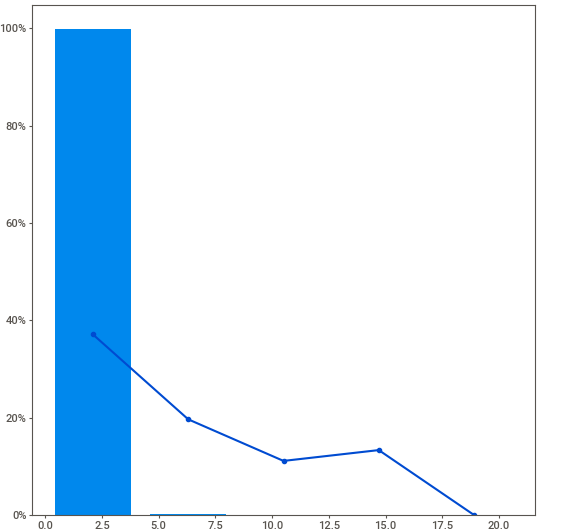
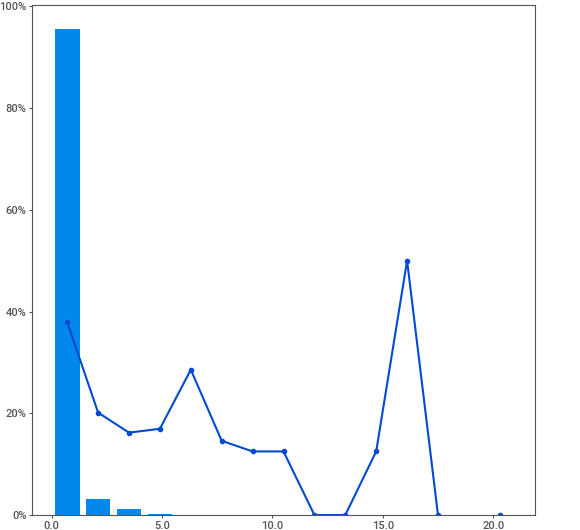
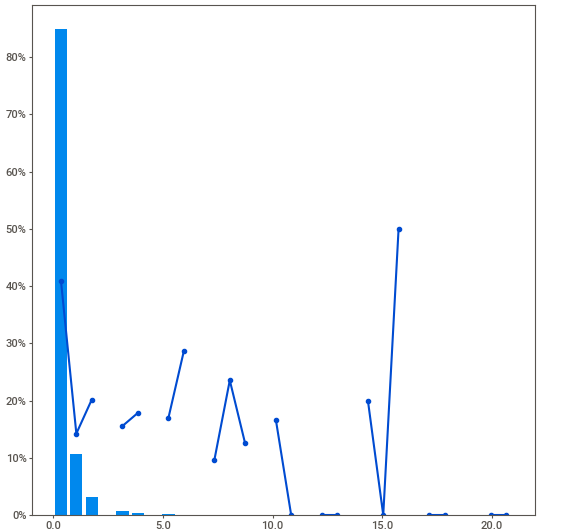
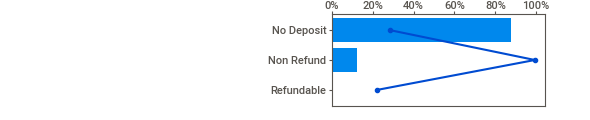
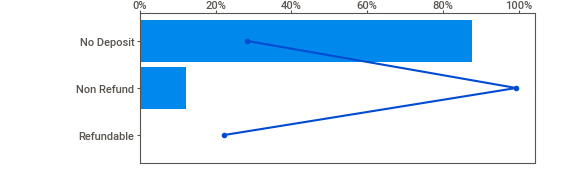
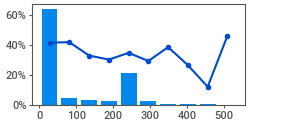
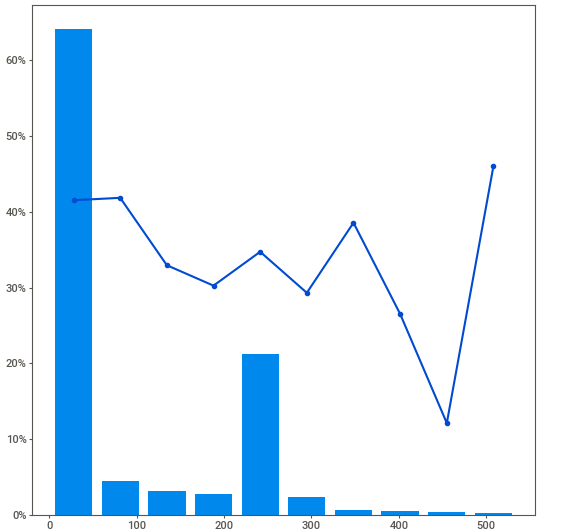
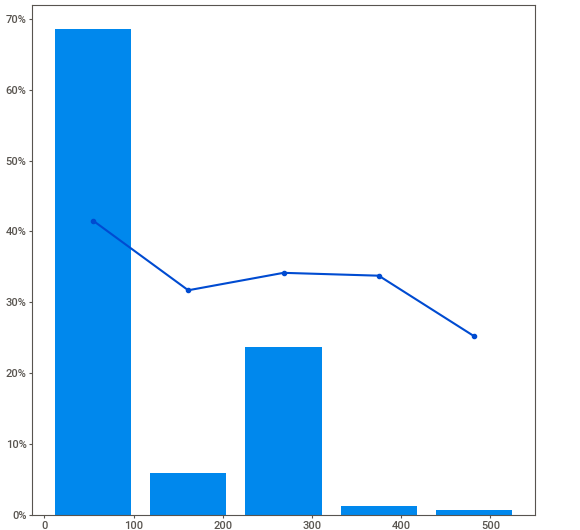
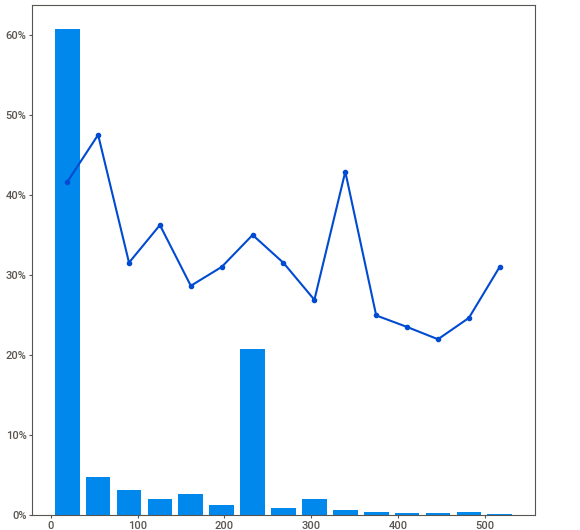
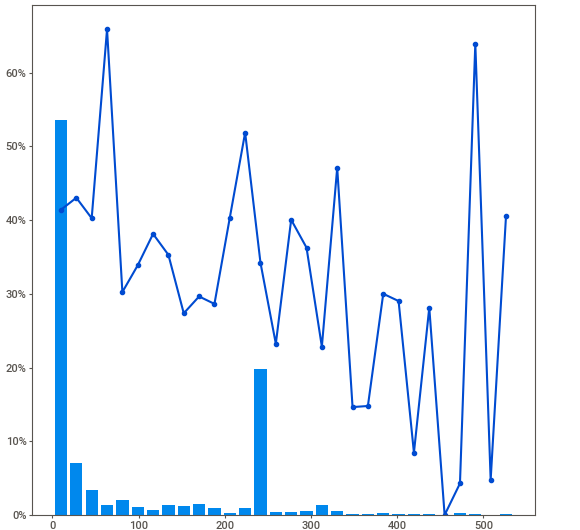
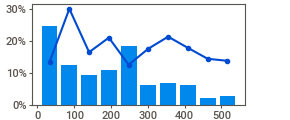
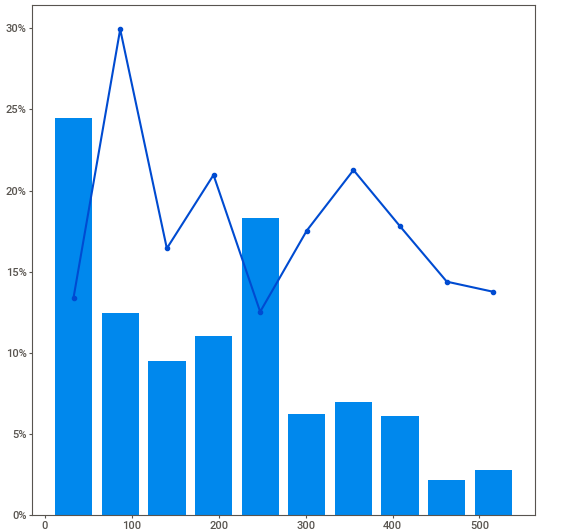
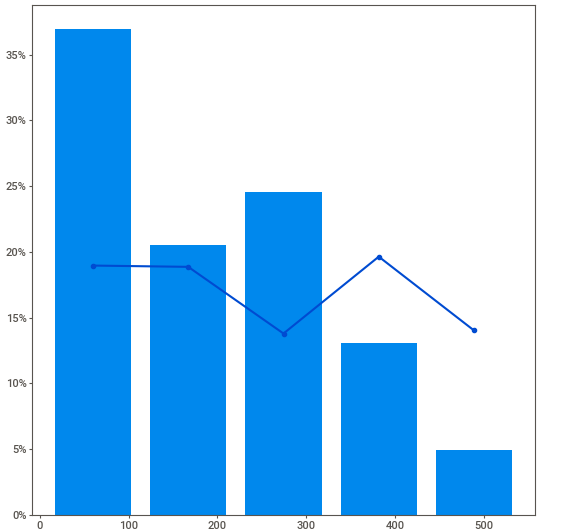
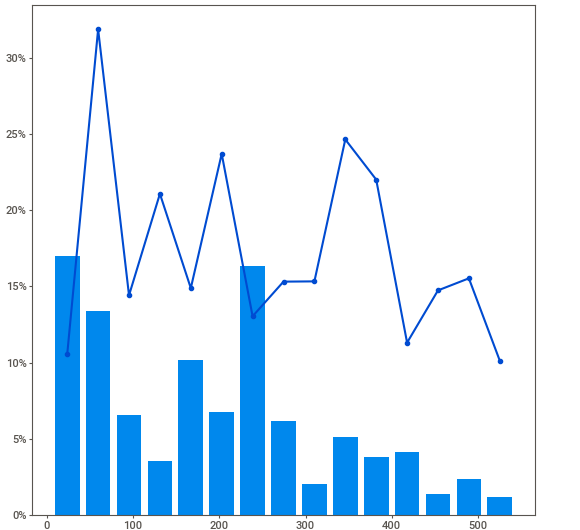
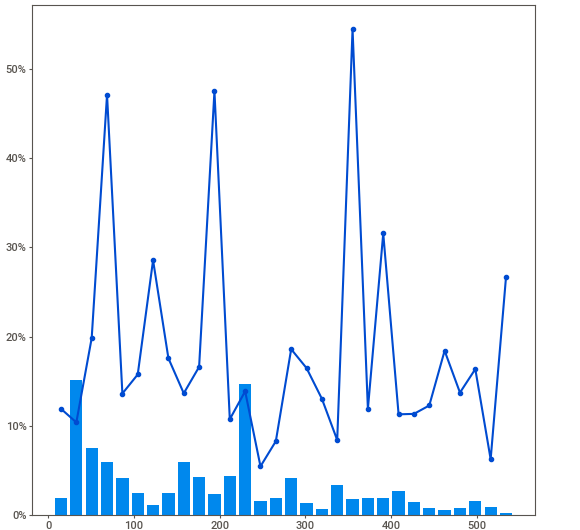
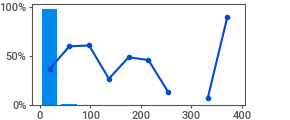
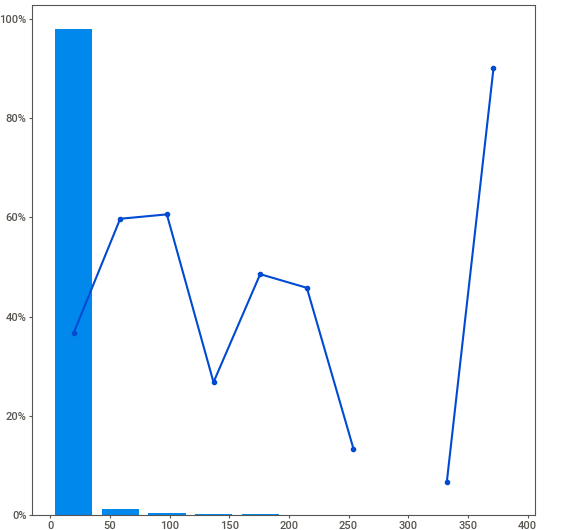
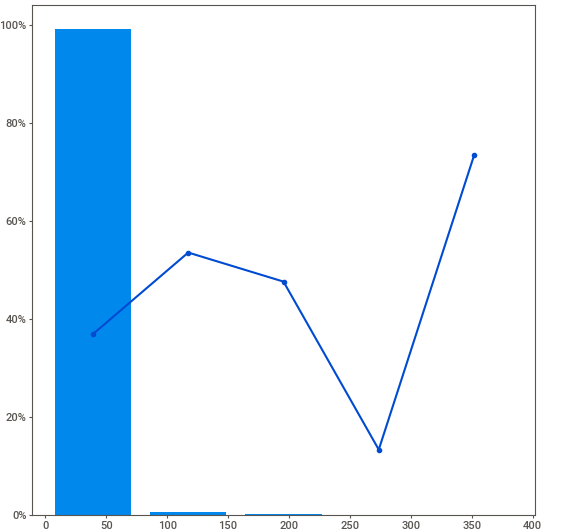
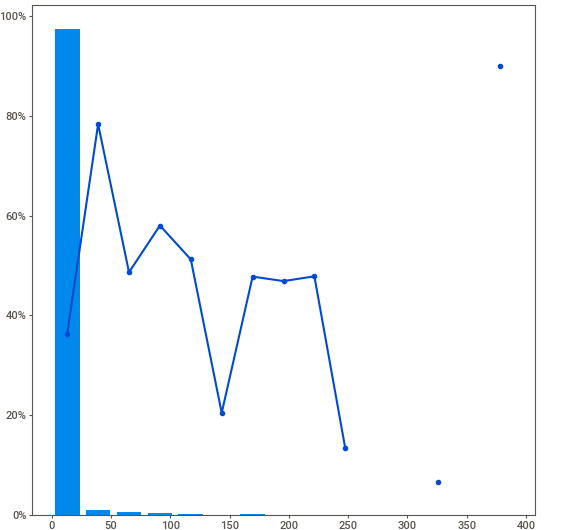
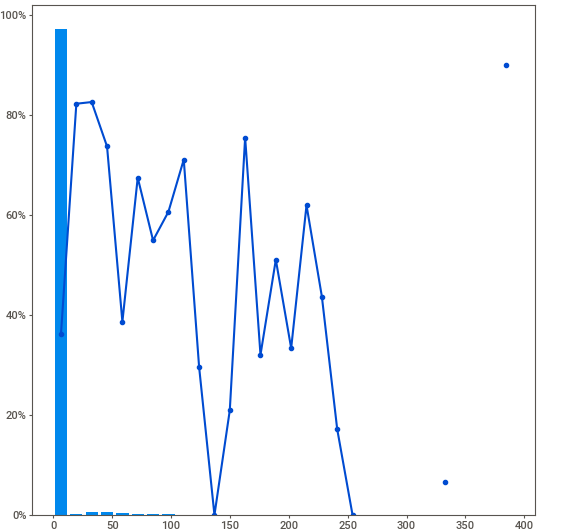
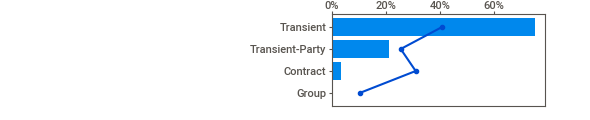
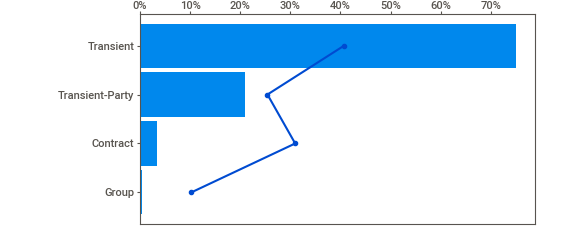
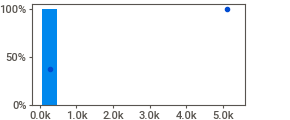
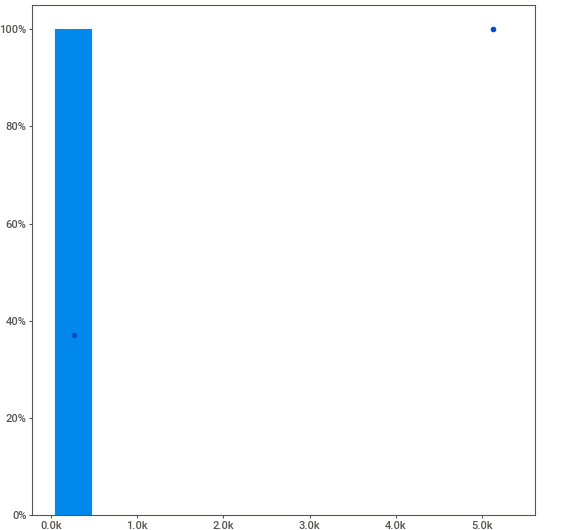
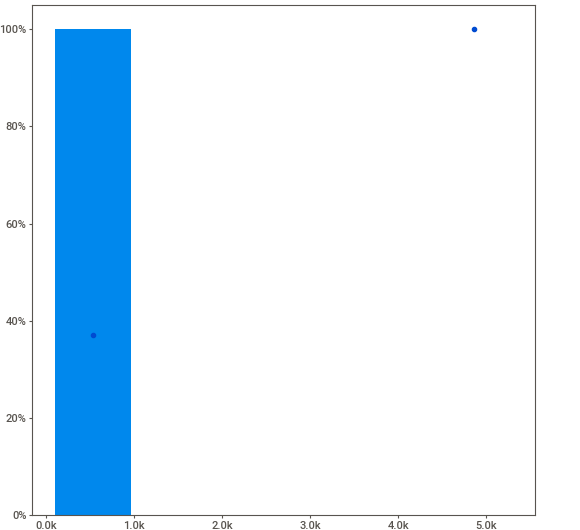
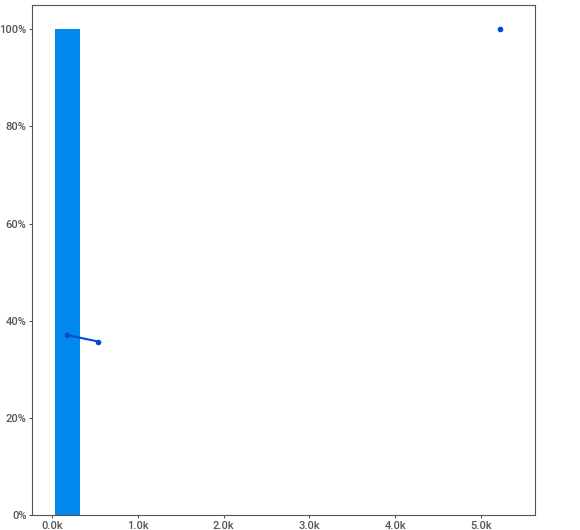
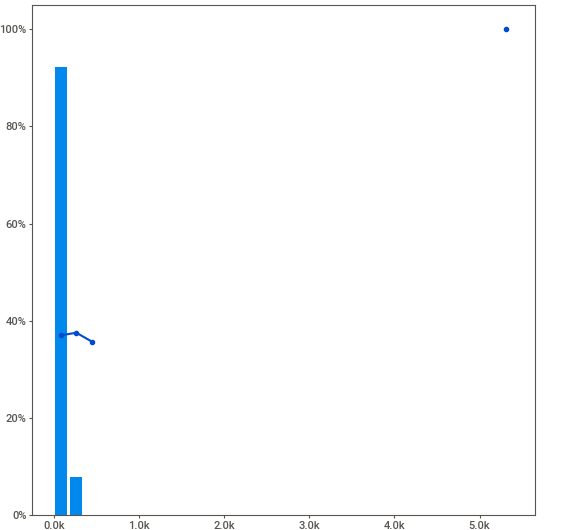
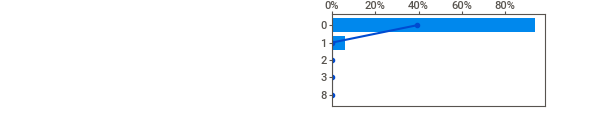
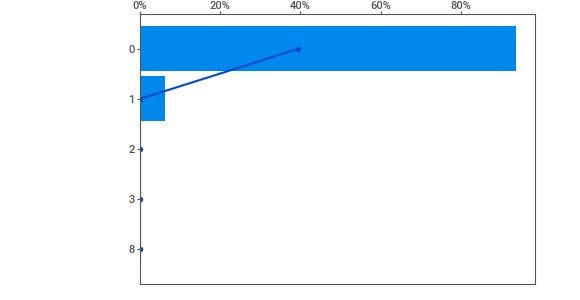
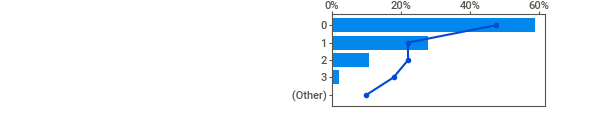
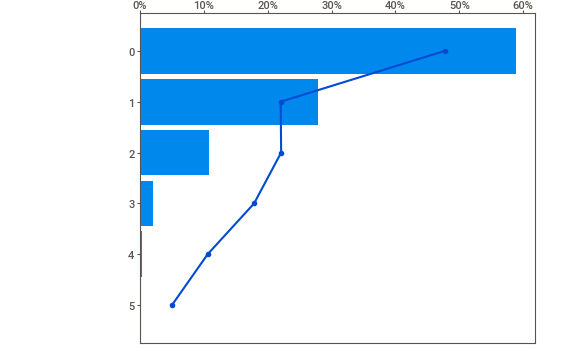
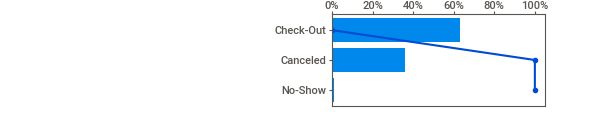
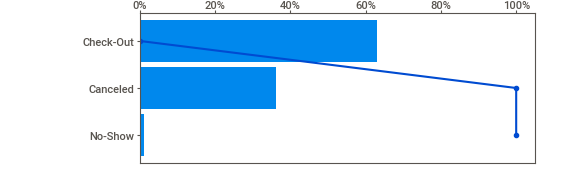
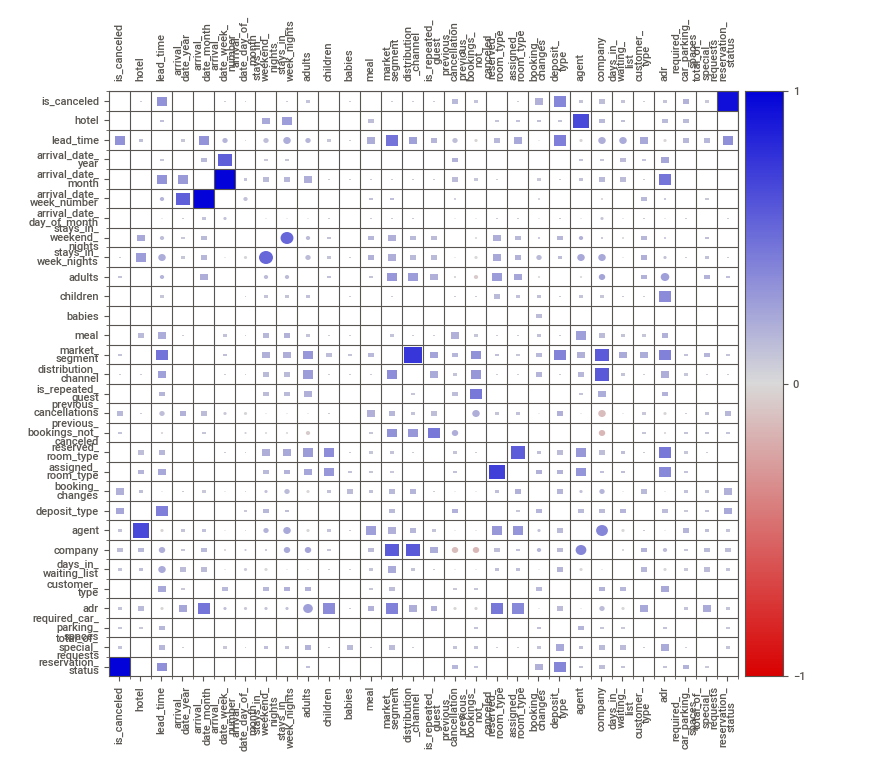
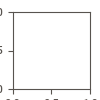

In [13]:
report.show_notebook()

# Dublicate rows treatment

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df['babies'].value_counts()

babies
0     86482
1       897
2        15
10        1
9         1
Name: count, dtype: int64

In [16]:
df['meal'].replace('undefined','SC',inplace=True)

In [17]:
df['meal'].value_counts()

meal
BB           67978
SC            9481
HB            9085
Undefined      492
FB             360
Name: count, dtype: int64

since the mean of 'children' column is very low lets replace it with 0

for agent and country the both are categorical columns lets replace it with mode

In [18]:
df['agent'].fillna(df['agent'].mode()[0],inplace=True)
df['country'].fillna(df['country'].mode()[0],inplace=True)
df['children'].fillna(0,inplace=True)

company has more than 90% of missing values,so we drop the company

In [19]:
df.drop('company',axis=1,inplace=True)

In [20]:
df.isna().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                             False
days_in_waiting_list              False


In [21]:
df.duplicated().any()

True

In [22]:
df.drop_duplicates(inplace=True)

# Missing Value Treatment

In [23]:
# find the nul value in the dataset
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [24]:
#Checking the count of the missing values percentage, there are very few missing values there in the dataset
df.isnull().sum()/len(df)*100

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr         

In [25]:
df['agent'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Name: agent, Length: 87369, dtype: bool

In [26]:
missing=[]
for i in df.columns:
  if df[i].isnull().any():
      missing.append(i)
missing

[]

In [27]:
df['children'].value_counts()

children
0.0     79005
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: count, dtype: int64

In [28]:
df['country'].value_counts()

country
PRT    27882
GBR    10432
FRA     8837
ESP     7251
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: count, Length: 177, dtype: int64

In [29]:
df['agent'].describe()

count    87369.000000
mean        82.266284
std        109.058280
min          1.000000
25%          9.000000
50%          9.000000
75%        234.000000
max        535.000000
Name: agent, dtype: float64

Fill the all missing values by the help of the using mode

In [30]:
for col in df.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [31]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

find the duplicated

In [32]:
df.duplicated().sum()

0

In [33]:
df.drop_duplicates(inplace=True)

In [34]:
df.shape

(87369, 31)

# Exploratory Data Analysis

# Analyze the categorical data

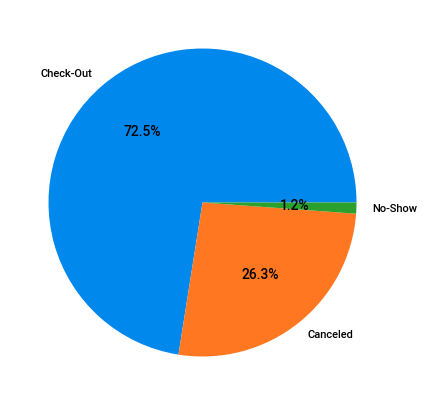

In [35]:
plt.figure(figsize=(15,5))

plt.pie(df['reservation_status'].value_counts(normalize=True), labels=df['reservation_status'].unique(), autopct='%1.1f%%')
plt.show()

In [36]:
pd.crosstab(df['reservation_status'], df['hotel']) # know here we creating the cross tab to understand


hotel,City Hotel,Resort Hotel
reservation_status,,
Canceled,15301,7709
Check-Out,37376,25969
No-Show,748,266


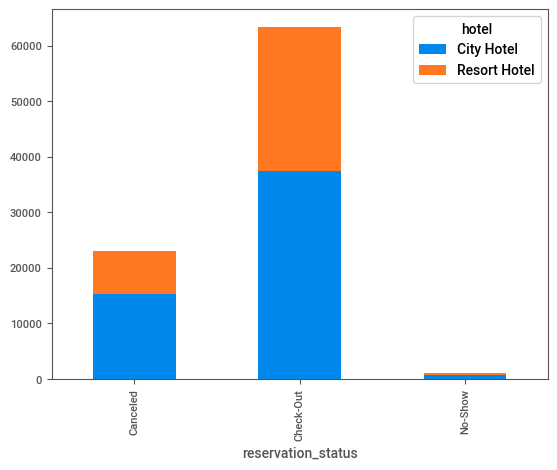

In [37]:
df.groupby('reservation_status')['hotel'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.show()

In [38]:
pd.crosstab(df['reservation_status'], df['hotel'])


hotel,City Hotel,Resort Hotel
reservation_status,,
Canceled,15301,7709
Check-Out,37376,25969
No-Show,748,266


<Axes: xlabel='deposit_type', ylabel='count'>

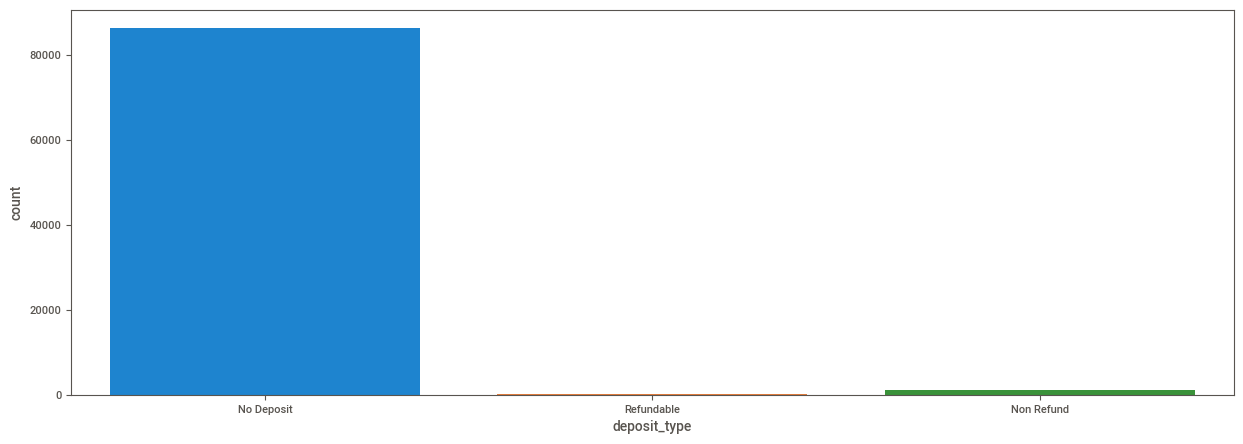

In [39]:
plt.figure(figsize=(15,5)) # here  we plot the count plot to know the how much customer deposit type
sns.countplot(df,x='deposit_type')

In [40]:
pd.crosstab(df['deposit_type'], df['hotel'])

hotel,City Hotel,Resort Hotel
deposit_type,,
No Deposit,52565,33659
Non Refund,845,193
Refundable,15,92


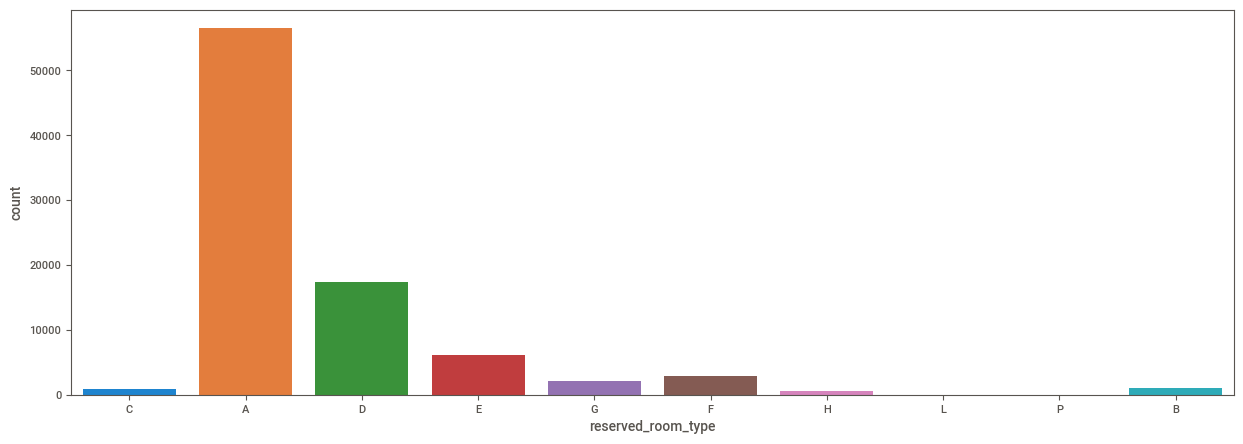

In [41]:
plt.figure(figsize=(15,5))

sns.countplot(df,x='reserved_room_type',)
plt.show()

In [42]:
pd.crosstab(df['reserved_room_type'], df['hotel'])

hotel,City Hotel,Resort Hotel
reserved_room_type,,
A,37939,18590
B,996,3
C,14,901
D,10766,6631
E,1470,4577
F,1757,1065
G,479,1573
H,0,596
L,0,6


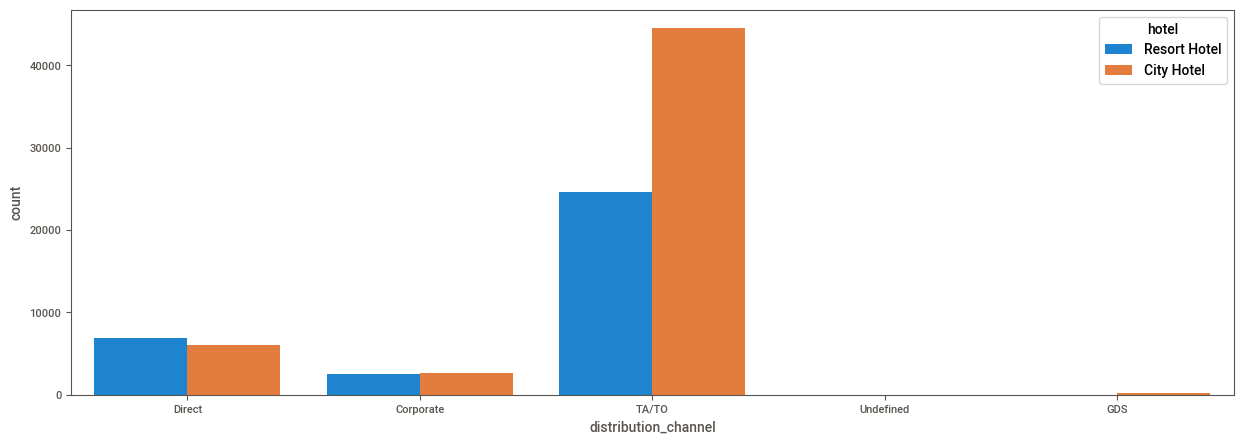

In [43]:
plt.figure(figsize=(15,5)) # This plot is using to know how to come our cutmeor in our hotel

sns.countplot(df,x='distribution_channel',hue='hotel')
plt.show()

In [44]:
pd.crosstab(df['market_segment'], df['hotel'])


hotel,City Hotel,Resort Hotel
market_segment,,
Aviation,227,0
Complementary,513,189
Corporate,2227,1975
Direct,5559,6239
Groups,2635,2305
Offline TA/TO,7271,6615
Online TA,34991,16621
Undefined,2,0


In [45]:
pd.crosstab(df['hotel'], df['is_canceled'])


is_canceled,0,1
hotel,,
City Hotel,37376,16049
Resort Hotel,25969,7975


<Axes: xlabel='market_segment', ylabel='count'>

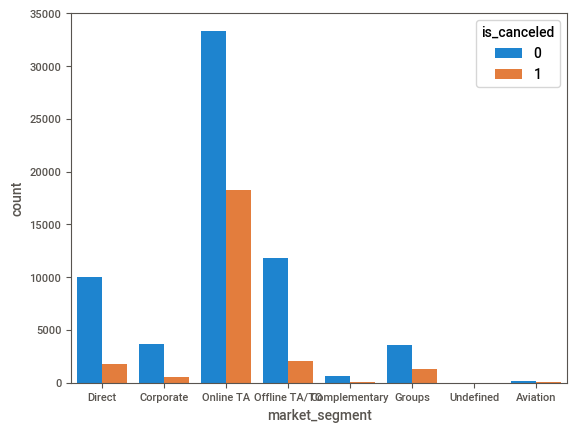

In [46]:
sns.countplot(df,x='market_segment',hue='is_canceled')


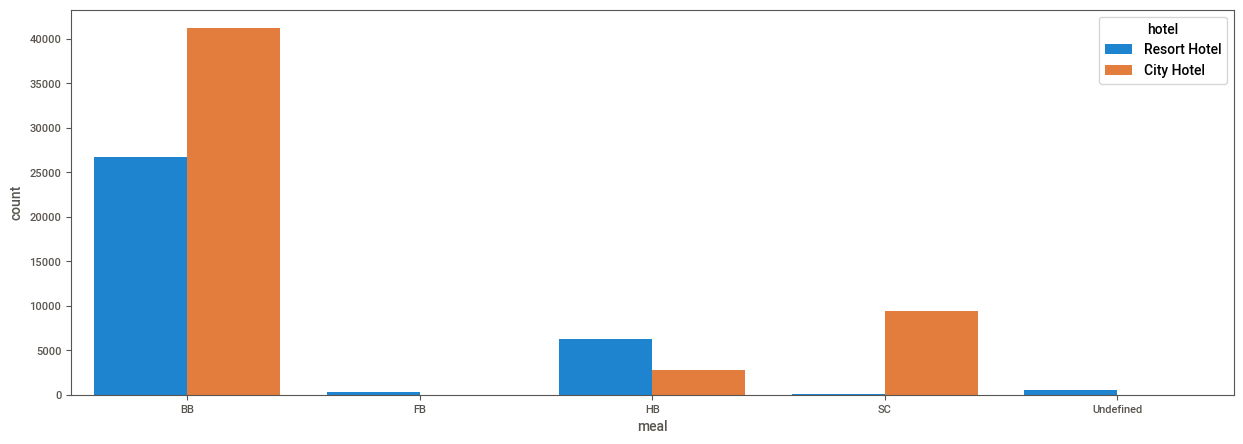

In [47]:
plt.figure(figsize=(15,5))

sns.countplot(df,x='meal',hue='hotel')
plt.show()

In [48]:
pd.crosstab(df['arrival_date_month'], df['hotel'])


hotel,City Hotel,Resort Hotel
arrival_date_month,,
April,5079,2825
August,6591,4666
December,3014,2114
February,3605,2486
January,2730,1961
July,5744,4311
June,5005,2760
March,4856,2654
May,5412,2942


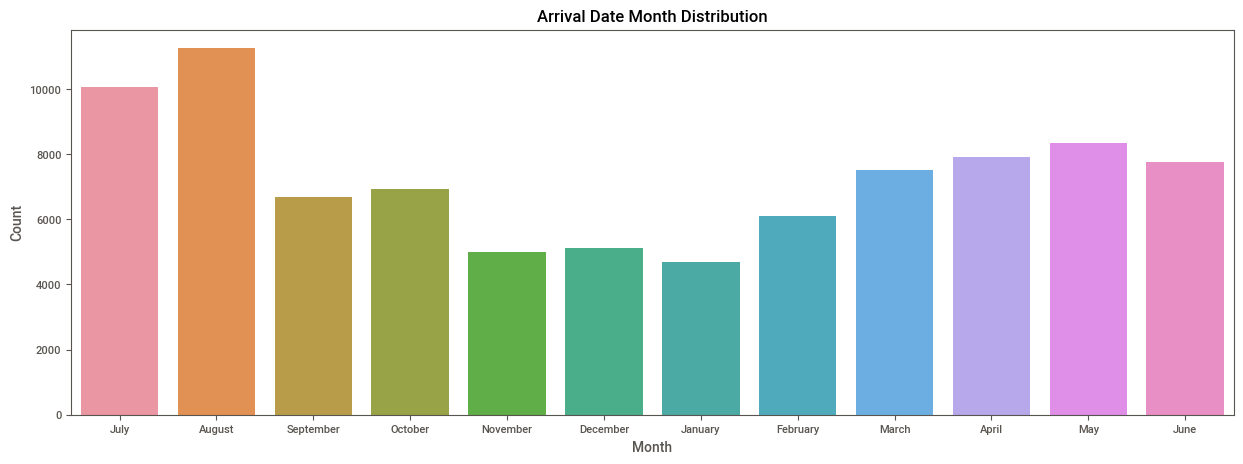

In [49]:
plt.figure(figsize=(15,5))

sns.countplot(df,x='arrival_date_month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Arrival Date Month Distribution')
plt.show()

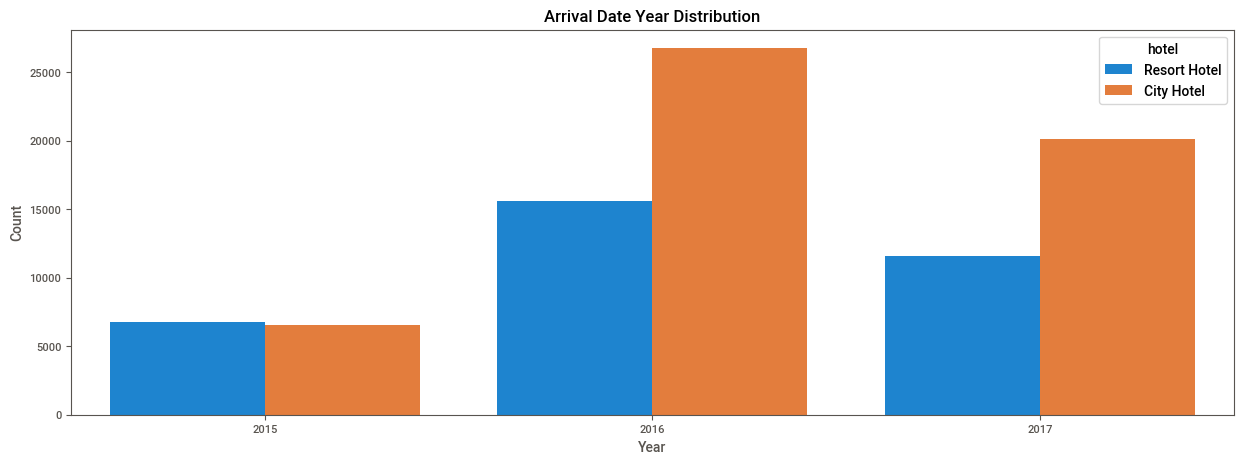

In [50]:
plt.figure(figsize=(15,5))

sns.countplot(df,x='arrival_date_year',hue='hotel')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Arrival Date Year Distribution')
plt.show()


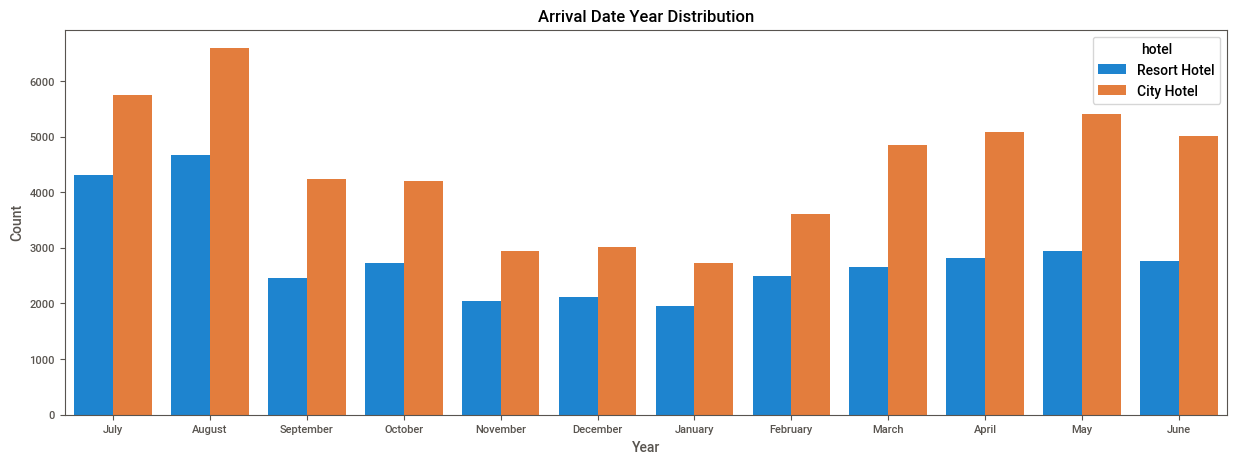

In [51]:
plt.figure(figsize=(15,5))

sns.countplot(df,x='arrival_date_month',hue='hotel')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Arrival Date Year Distribution')
plt.show()


# Encoding and Feature Scaling

In [52]:
# Separating the numerical and categorical columns
from sklearn.preprocessing import StandardScaler
def data_type(dataset):
    """
    Function to identify the numerical and categorical data columns
    :param dataset: Dataframe
    :return: list of numerical and categorical columns
    """
    numerical = []
    categorical = []
    for i in df.columns:
        if df[i].dtype == 'int64' or df[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(df)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(df):
    """
    Generates a list of binary columns in a dataframe.
    """
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(df)



In [53]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [54]:
numerical

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [55]:
categorical

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [56]:
# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]
from sklearn.preprocessing import StandardScaler,PowerTransformer
def encoding(dataset, categorical):
    """
    Function to automate the process of encoding the categorical data
    :param dataset: Dataframe
    :param categorical: List of categorical columns
    :return: Dataframe
    """
    for i in categorical:
        dataset[i] = dataset[i].astype('category')
        dataset[i] = dataset[i].cat.codes
    return dataset

dataset_cat= encoding(df, categorical)

def feature_scaling(dataset, numerical):
    """
    Function to automate the process of feature scaling the numerical data
    :param dataset: Dataframe
    :param numerical: List of numerical columns
    :return: Dataframe
    """
    sc_x = StandardScaler()
    dataset[numerical] = sc_x.fit_transform(dataset[numerical])
    return dataset

dataset_num= feature_scaling(df, numerical)

In [57]:
power_transformer=PowerTransformer()
dataset_pt =power_transformer.fit_transform(dataset_num[numerical])
dataset_pt=pd.DataFrame(df,columns=dataset_num[numerical].columns)
dataset_final= pd.concat([dataset_pt,dataset_cat[categorical],df[binary_cols]],axis=1)
dataset_final.head()


,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,...,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,is_canceled,is_repeated_guest
0,3.045543,-1.763974,0.011727,-1.676923,-0.974296,-1.278573,0.198011,-0.304159,-0.095303,-0.082402,...,3,1,2,2,0,2,1,121,0,0
1,7.635575,-1.763974,0.011727,-1.676923,-0.974296,-1.278573,0.198011,-0.304159,-0.095303,-0.082402,...,3,1,2,2,0,2,1,121,0,0
2,-0.847269,-1.763974,0.011727,-1.676923,-0.974296,-0.791645,-1.398227,-0.304159,-0.095303,-0.082402,...,3,1,0,2,0,2,1,122,0,0
3,-0.777547,-1.763974,0.011727,-1.676923,-0.974296,-0.791645,-1.398227,-0.304159,-0.095303,-0.082402,...,2,0,0,0,0,2,1,122,0,0
4,-0.765926,-1.763974,0.011727,-1.676923,-0.974296,-0.304717,0.198011,-0.304159,-0.095303,-0.082402,...,6,3,0,0,0,2,1,123,0,0


In [58]:
X = df.drop('is_canceled', axis=1)
y=df['is_canceled']

In [59]:
X.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,3.045543,-1.763974,5,0.011727,-1.676923,-0.974296,-1.278573,0.198011,-0.304159,...,3.751129,0,-0.671812,-0.074851,2,-1.933429,-0.29922,-0.839757,1,121
1,1,7.635575,-1.763974,5,0.011727,-1.676923,-0.974296,-1.278573,0.198011,-0.304159,...,5.126013,0,-0.671812,-0.074851,2,-1.933429,-0.29922,-0.839757,1,121
2,1,-0.847269,-1.763974,5,0.011727,-1.676923,-0.974296,-0.791645,-1.398227,-0.304159,...,-0.373522,0,-0.671812,-0.074851,2,-0.569898,-0.29922,-0.839757,1,122
3,1,-0.777547,-1.763974,5,0.011727,-1.676923,-0.974296,-0.791645,-1.398227,-0.304159,...,-0.373522,0,2.033179,-0.074851,2,-0.569898,-0.29922,-0.839757,1,122
4,1,-0.765926,-1.763974,5,0.011727,-1.676923,-0.974296,-0.304717,0.198011,-0.304159,...,-0.373522,0,1.446333,-0.074851,2,-0.151749,-0.29922,0.362260,1,123


In [60]:
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 87369, dtype: int64

# Splitting the data into Train and Test

In [61]:
#Splitting the dataset into train and test based on the 70-30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the model on training dataset

In [62]:
#Applying the Decision Tree on the training dataset
from sklearn.tree import DecisionTreeClassifier
dtmodel_ini = DecisionTreeClassifier()
dtmodel_ini.fit(X_train,y_train)

DecisionTreeClassifier()

# train the decision tree

In [63]:
#  train the decision tree

model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dtmodel=model.fit(X_train, y_train )


In [64]:
import graphviz

In [65]:
y_pred_ini=dtmodel_ini.predict(X_train)
y_pred_ini_test=dtmodel_ini.predict(X_test)

# Check the accuracy of the model

In [66]:
from sklearn.metrics import accuracy_score,classification_report, precision_score,log_loss, recall_score, f1_score, confusion_matrix, roc_auc_score, matthews_corrcoef

In [67]:
accuracy = accuracy_score(y_test, y_pred_ini_test)
precision = precision_score(y_test, y_pred_ini_test, average='weighted')
recall = recall_score(y_test, y_pred_ini_test, average='weighted')
f1 = f1_score(y_test, y_pred_ini_test, average='weighted')
r2_train=r2_score(y_train,y_pred_ini)
r2_test=r2_score(y_test,y_pred_ini_test)


In [68]:
print(r2_test,r2_train)

1.0 1.0


In [69]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("r2_test:",r2_test)
print("r2_train:",r2_train)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
r2_test: 1.0
r2_train: 1.0


# Evaluate the model using the confusion metrics

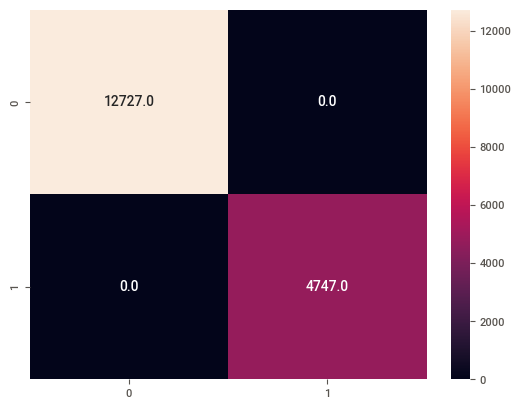

In [70]:
# here we create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_ini_test)
sns.heatmap(conf_matrix, annot=True, fmt='.1f')
plt.show()

# RO Curve

In [71]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the test set
ptest = dtmodel.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, ptest)
roc_auc = auc(fpr, tpr)

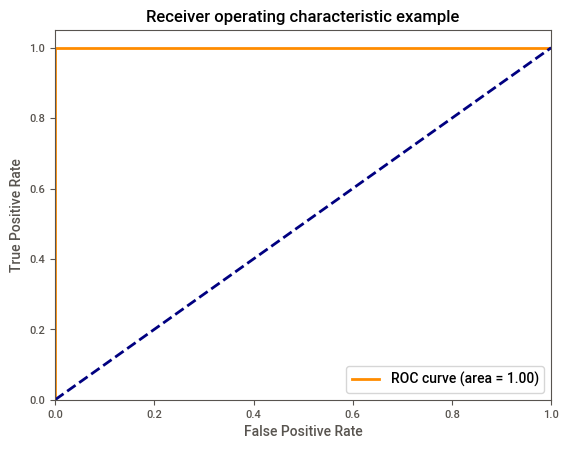

In [72]:
# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

F1 Score

In [73]:
#Using F1 Score we are checking the accuracy on the testing dataset
target_names= ["Negative(0)","Positive(1)"]
# Classification Report
print(classification_report(y_test,dtmodel_ini.predict(X_test),target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       1.00      1.00      1.00     12727
 Positive(1)       1.00      1.00      1.00      4747

    accuracy                           1.00     17474
   macro avg       1.00      1.00      1.00     17474
weighted avg       1.00      1.00      1.00     17474



 Log Loss

In [74]:
#Using Logloss we are checking the accuracy on the testing dataset
log_loss(y_test,dtmodel_ini.predict(X_test))

9.992007221626413e-16

# Comparing the Training and Testing Accuracies

In [75]:
#Storing the predicted values of training dataset in y_pred_train
y_pred_train = dtmodel_ini.predict(X_train)

In [76]:
#Checking the accuracy of training dataset 
accuracy_score(y_train,y_pred_train)

1.0

# Applying Grid Search Cross Validation to find the best value of depth

In [77]:
#Using Grid Search cross validation technique we will find the best value of hyper parameters - 
#Here we are finding the best kernel
from sklearn.model_selection import GridSearchCV
parameters = [ {'max_depth': [1,2,3,4,5,6,7,8,9,10], 'min_samples_split':[10,20,30,40,50,60]}]
grid_search = GridSearchCV(estimator = dtmodel_ini,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [78]:
best_parameters

{'max_depth': 2, 'min_samples_split': 10}

We are going with the default criteria of Gini as we prefer to go for it as Entropy consists of log which can be computationaly more exhaustive.

In [79]:
#Applying the Decision Tree on the training dataset
from sklearn.tree import DecisionTreeClassifier
dtmodel_tuned_pruned = DecisionTreeClassifier(max_depth=2,min_samples_split=10)
dtmodel_tuned_pruned.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=10)

In [80]:
#Running the model on the test dataset
y_pred_tuned_pruned = dtmodel_tuned_pruned.predict(X_test)

In [81]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_tuned_pruned)

1.0

In [82]:
#Running the model on the test dataset
y_pred = dtmodel_tuned_pruned.predict(X_train)

In [83]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_train,y_pred)

1.0

In [84]:
# create an empty dataframe to store the scores for various algorithms
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_auc_score, f1_score
score_card = pd.DataFrame(columns=['model_name','Accuracy Score','Precision Score','Recall Score','AUC Score','f1 Score'])

# append the result table for all performance scores

def update_score_card(y_test,y_pred,model_name):

    # assign 'score_card' as global variable
    global score_card
    
    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card._append({'model_name':model_name,
                                    'Accuracy Score' : accuracy_score(y_test, y_pred),
                                    'Precision Score': precision_score(y_test, y_pred),
                                    'Recall Score': recall_score(y_test, y_pred),
                                    'AUC Score': roc_auc_score(y_test, y_pred),
                                    'f1 Score': f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [85]:
update_score_card(y_test,y_pred_ini_test,'initial_model')

In [86]:
update_score_card(y_test,y_pred_tuned_pruned,'pruned_model')

In [87]:
score_card

,model_name,Accuracy Score,Precision Score,Recall Score,AUC Score,f1 Score
0,initial_model,1.0,1.0,1.0,1.0,1.0
1,pruned_model,1.0,1.0,1.0,1.0,1.0


In [88]:
from sklearn import tree
print(tree.export_text(dtmodel_tuned_pruned))

|--- feature_28 <= 0.50
|   |--- class: 1
|--- feature_28 >  0.50
|   |--- feature_28 <= 1.50
|   |   |--- class: 0
|   |--- feature_28 >  1.50
|   |   |--- class: 1



In [89]:
!pip install graphviz 


In [90]:
!pip install pydotplus

In [91]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import graphviz

In [92]:
feature_names = df.iloc[:,0:30]

In [93]:
feature_names = feature_names.columns

In [94]:
feature_names

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [95]:
# Create A Dot Plot
dot_data = tree.export_graphviz(dtmodel_tuned_pruned,out_file=None,feature_names=feature_names,class_names=target_names)

In [96]:
# Draw a graph
graph = pydotplus.graph_from_dot_data(dot_data)

In [97]:
graph